### Carga de los datos

In [2]:
import pyodbc
print(pyodbc.drivers())

['SQL Server', 'Microsoft Access Driver (*.mdb, *.accdb)', 'Microsoft Excel Driver (*.xls, *.xlsx, *.xlsm, *.xlsb)', 'Microsoft Access Text Driver (*.txt, *.csv)']


In [ ]:
#datos de calidad de aire
db_path ="C:\\Users\\espin\\Desktop\\bdd\\Climate-Change-Bio-Bases-main\\contamination\\MO_AMA_HAPS.accdb" 

# String de conexión correcto
conn_str = f"DRIVER={{Microsoft Access Driver (*.mdb, *.accdb)}};DBQ={db_path};"

# Crear el engine de SQLAlchemy
engine = sa.create_engine(f"access+pyodbc:///?odbc_connect={conn_str}")

# Probar la conexión
with engine.connect() as conn:
    print(" Conexión exitosa a la base de datos")

In [67]:
# Inspeccionar la base de datos
inspector = sa.inspect(engine)

# Obtener los nombres de las tablas
tables = inspector.get_table_names()

print("Tablas en la base de datos:")
print(tables)

Tablas en la base de datos:
['AMBIENT_MONITORING_ARCHIVE_OUTPUT']


In [ ]:
query = "SELECT * FROM AMBIENT_MONITORING_ARCHIVE_OUTPUT"
df = pd.read_sql(query, engine)

# Mostrar las primeras filas
pd.set_option("display.max_columns", None)  # Mostrar todas las columnas
df["YEAR"] = pd.to_numeric(df["YEAR"], errors="coerce")
print(df.columns)

In [69]:
df.head(5)

STATE_ABBR AMA_SITE_CODE AQS_POC  PROGRAM  YEAR  QUARTER SAMPLE_DATE  \
0         HI     150010005       1  IMPROVE  1990        1  1990-01-03   
1         HI     150010005       1  IMPROVE  1990        1  1990-01-03   
2         HI     150010005       1  IMPROVE  1990        1  1990-01-03   
3         HI     150010005       1  IMPROVE  1990        1  1990-01-03   
4         HI     150010005       1  IMPROVE  1990        1  1990-01-03   

  SAMPLE_START_TIME AQS_PARAMETER_CODE AQS_PARAMETER_NAME DATA_SOURCE  \
0             00:00              88103    Arsenic (PM2.5)         AQS   
1             00:00              88112   Chromium (PM2.5)         AQS   
2             00:00              88115  Chlorine Pm2.5 Lc         AQS   
3             00:00              88128       Lead (PM2.5)         AQS   
4             00:00              88132  Manganese (PM2.5)         AQS   

  DATA_SOURCE_PULLDATE DURATION_DESC  SAMPLE_VALUE_REPORTED AQS_UNIT_CODE  \
0             20231201      24 HOURS                0.00000           105   
1             20231201      24 HOURS                0.00000           105   
2             20231201      24 HOURS                0.34799           105   
3             20231201      24 HOURS                0.00000           105   
4             20231201      24 HOURS                0.00000           105   

          UNIT_DESC SAMPLING_FREQUENCY_CODE COMMENT  SAMPLE_VALUE_STD  \
0  UG/CU METER (LC)                       6    None               0.0   
1  UG/CU METER (LC)                       6    None               0.0   
2  UG/CU METER (LC)                       6    None               NaN   
3  UG/CU METER (LC)                       6    None               0.0   
4  UG/CU METER (LC)                       6    None               0.0   

   SAMPLE_VALUE_STD_FINAL_UG_M3 SAMPLE_VALUE_STD_FINAL_TYPE  \
0                       0.00000                           L   
1                       0.00000                           L   
2                       0.34799                           L   
3                       0.00000                           L   
4                       0.00000                           L   

  AQS_PARAMETER_CODE_FINAL AQS_PARAMETER_NAME_FINAL  ALTERNATE_MDL  \
0                    88103          Arsenic (PM2.5)        0.00015   
1                    88112         Chromium (PM2.5)        0.00035   
2                    88115        Chlorine Pm2.5 Lc        0.00112   
3                    88128             Lead (PM2.5)        0.00042   
4                    88132        Manganese (PM2.5)        0.00034   

   MDL_STD_UG_M3 MDL_TYPE AQS_NULL_DATA_CODE AQS_QUALIFIER_01  \
0            NaN     None               None             None   
1            NaN     None               None             None   
2            NaN     None               None             None   
3            NaN     None               None             None   
4            NaN     None               None             None   

  AQS_QUALIFIER_02 AQS_QUALIFIER_03 AQS_QUALIFIER_04 AQS_QUALIFIER_05  \
0             None             None             None             None   
1             None             None             None             None   
2             None             None             None             None   
3             None             None             None             None   
4             None             None             None             None   

  AQS_QUALIFIER_06 AQS_QUALIFIER_07 AQS_QUALIFIER_08 AQS_QUALIFIER_09  \
0             None             None             None             None   
1             None             None             None             None   
2             None             None             None             None   
3             None             None             None             None   
4             None             None             None             None   

  AQS_QUALIFIER_10 AQS_METHOD_CODE  \
0             None             802   
1             None             802   
2             None             80

In [73]:
# Filtrar el DataFrame
df_filtrado = df[["YEAR", "MONITOR_LATITUDE", "MONITOR_LONGITUDE", "AQS_PARAMETER_NAME", "SAMPLE_VALUE_STD_FINAL_UG_M3"]]

# Renombrar columnas para mayor claridad
df_filtrado = df_filtrado.rename(columns={
    "YEAR": "YEAR",
    "MONITOR_LATITUDE": "LATITUDE",
    "MONITOR_LONGITUDE": "LONGITUDE",
    "AQS_PARAMETER_NAME": "Contaminante",
    "SAMPLE_VALUE_STD_FINAL_UG_M3": "Concentración (µg/m³)"
})

# Mostrar las primeras filas del nuevo DataFrame
df_filtrado.head(100)

YEAR   LATITUDE   LONGITUDE       Contaminante  Concentración (µg/m³)
0   1990  19.430799 -155.257797    Arsenic (PM2.5)                0.00000
1   1990  19.430799 -155.257797   Chromium (PM2.5)                0.00000
2   1990  19.430799 -155.257797  Chlorine Pm2.5 Lc                0.34799
3   1990  19.430799 -155.257797       Lead (PM2.5)                0.00000
4   1990  19.430799 -155.257797  Manganese (PM2.5)                0.00000
..   ...        ...         ...                ...                    ...
95  1990  19.430799 -155.257797  Selenium Pm2.5 Lc                0.00038
96  1990  19.430799 -155.257797    Arsenic (PM2.5)                0.00000
97  1990  19.430799 -155.257797   Chromium (PM2.5)                0.00031
98  1990  19.430799 -155.257797  Chlorine Pm2.5 Lc                0.00000
99  1990  19.430799 -155.257797       Lead (PM2.5)                0.00685

[100 rows x 5 columns]

In [75]:
df_pivot = df_filtrado.pivot_table(
    index=["LATITUDE", "LONGITUDE", "YEAR"],  # Claves de agrupación
    columns="Contaminante",  # Convertimos los contaminantes en columnas
    values="Concentración (µg/m³)",  # Valores de concentración
    fill_value=0  # Si no hay medición, poner 0
).reset_index()  # Restaurar índice para mantener formato de DataFrame

# Mostrar las primeras filas del nuevo DataFrame normalizado
df_pivot.head(200)

Contaminante   LATITUDE   LONGITUDE  YEAR  1,1,1-Trichloroethane  \
0             19.430799 -155.257797  1990                    0.0   
1             19.430799 -155.257797  1991                    0.0   
2             19.430799 -155.257797  1992                    0.0   
3             19.430799 -155.257797  1993                    0.0   
4             19.430799 -155.257797  2001                    0.0   
..                  ...         ...   ...                    ...   
173           21.392834 -157.969131  2007                    0.0   
174           21.392834 -157.969131  2008                    0.0   
175           21.392834 -157.969131  2009                    0.0   
176           21.392834 -157.969131  2010                    0.0   
177           21.392834 -157.969131  2011                    0.0   

Contaminante  1,2-Dichloropropane  1,3-Butadiene  Acetaldehyde  \
0                             0.0            0.0      0.000000   
1                             0.0            0.0      0.000000   
2                             0.0            0.0      0.000000   
3                             0.0            0.0      0.000000   
4                             0.0            0.0      0.000000   
..                            ...            ...           ...   
173                           0.0            0.0      1.154485   
174                           0.0            0.0      1.216163   
175                           0.0            0.0      1.737417   
176                           0.0            0.0      1.683657   
177                           0.0            0.0      1.946794   

Contaminante  Antimony (PM2.5)  Arsenic (PM2.5)   Benzene  Beryllium (tsp)  \
0                     0.000000         0.000069  0.000000         0.000000   
1                     0.000000         0.000022  0.000000         0.000000   
2                     0.000000         0.000011  0.000000         0.000000   
3                     0.000000         0.000019  0.000000         0.000000   
4                     0.000000         0.000042  0.000000         0.000000   
..                         ...              ...       ...              ...   
173                   0.000864         0.000225  0.674534         0.000004   
174                   0.002659         0.000285  1.078525         0.000034   
175                   0.005193         0.000236  1.221040         0.000049   
176                   0.000000         0.000000  0.616542         0.000037   
177                   0.000000         0.000000  0.000000         0.000076   

Contaminante  Bromomethane  Cadmium (PM2.5)  Cadmium (tsp)  \
0                      0.0         0.000000       0.000000   
1                      0.0         0.000000       0.000000   
2                      0.0         0.000000       0.000000   
3                      0.0         0.000000       0.000000   
4                      0.0         0.000000       0.000000   
..                     ...              ...            ...   
173                    0.0         0.001137       0.000025   
174                    0.0         0.000782       0.000028   
175                    0.0         0.001655       0.000055   
176                    0.0         0.000000       0.000040   
177                    0.0         0.000000       0.000002   

Contaminante  Carbon tetrachloride  Carbonyl Sulfide  Chlorine Pm2.5 Lc  \
0                         0.000000               0.0           0.092335   
1                         0.000000               0.0           0.073486   
2                         0.000000               0.0           0.065555   
3                         0.000000               0.0           0.064692   
4                         0.000000               0.0           0.122831   
..                             ...               ...                ...   
173                       0.153986               0.0           0.561652   
174                       0.032747               0.0           0.536467   
175                       0.00000

In [77]:
df_pivot.to_csv(r"D:\ZCONTAMINANTES\MO.csv", index=False, encoding="utf-8")

Unimos todos los archivos de contaminación en uno solo

In [25]:
import os

path = "C:\\Users\\espin\\Desktop\\bdd\\Climate-Change-Bio-Bases-main\\contamination"  

archivos_csv = [f for f in os.listdir(path) if f.endswith(".csv")]
dfs = []
for archivo in archivos_csv:
    ruta_completa = os.path.join(path, archivo)
    df = pd.read_csv(ruta_completa) 
    dfs.append(df)

df_final = pd.concat(dfs, ignore_index=True, sort=False).fillna(0)

ruta_guardado = "C:/Users/espin/Desktop/bdd/Climate-Change-Bio-Bases-main/contamination/contamination_data.csv"
df_final.to_csv(ruta_guardado, index=False)


In [ ]:
columnas_fijas = ["LATITUDE", "LONGITUDE", "YEAR"]

# Lista de contaminantes específicos que queremos incluir
contaminantes_especificos = [
    "Carbon tetrachloride", "Chloromethane", "Chloroform", "Trichloroethylene", "Tetrachloroethylene", "1,1,1-Trichloroethane", "1,1,2,2-Tetrachloroethane", "1,1,2-Trichloroethane", 
    "1,2-Dibromoethane", "Bromomethane", "Benzene", "Toluene", "Ethylbenzene", "M/P Xylene", "o-Xylene", "Styrene", "Methylene chloride", "1,3-Butadiene", "Chlorobenzene", 
    "alpha-Chlorotoluene", "Carbon disulfide", 'Carbonyl Sulfide', "Ethylene dichloride", 'Acetonitrile', 'Acrylonitrile', "Formaldehyde", "Acetaldehyde", 'Methanol', 
    'Benzo(a)pyrene (total tsp & vapor)', "Benzo[B]Fluoranthene (total tsp & vapor)", "Benzo[K]Fluoranthene (total tsp & vapor)", "Indeno[1,2,3-Cd]Pyrene (total tsp & vapor)", 
    "Fluoranthene (total tsp & vapor)", "Pyrene (total tsp & vapor)", "Naphthalene (total tsp & vapor)", "Phenanthrene (total tsp & vapor)", "Lead (Tsp) Lc Frm/Fem", 
    "Mercury, Gaseous Elemental", "Hexachloro-1,3-butadiene", "Dibenzofuran", "Heptachlor"
]

columnas_finales = columnas_fijas + contaminantes_especificos
columnas_finales = [col for col in columnas_finales if col in df_final.columns]

df_filtrado = df_final[columnas_finales]

df_filtrado.to_csv("C:/Users/espin/Desktop/bdd/Climate-Change-Bio-Bases-main/contamination/filtered_data.csv", index=False)

In [30]:
print(len(df_filtrado.columns.tolist()))

44


In [3]:
df_filtrado=pd.read_csv(r"C:\Users\espin\Desktop\bdd\Climate-Change-Bio-Bases-main\contamination\filtered_data.csv")

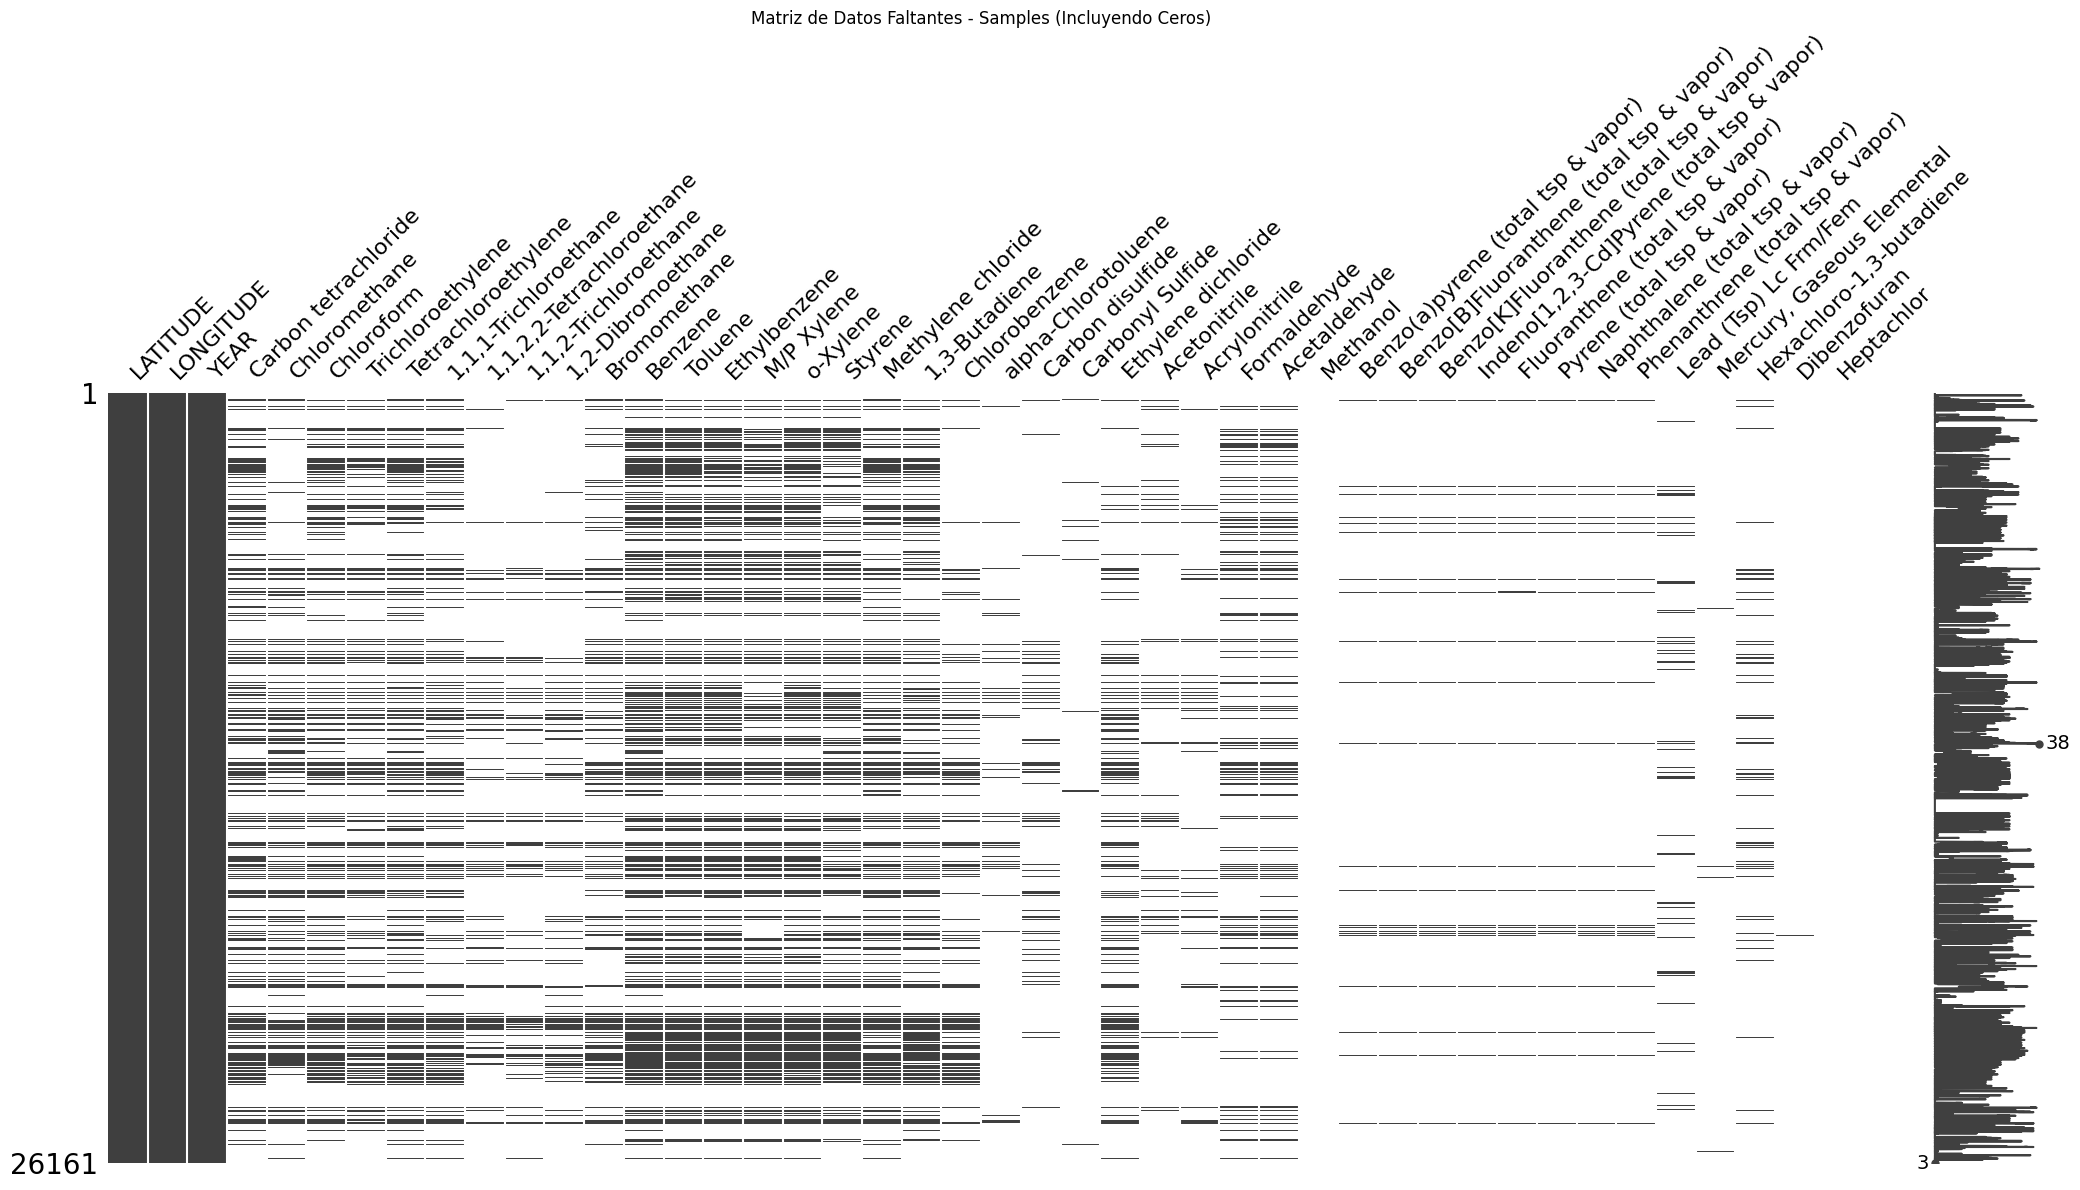

In [4]:
df_visualizacion = df_filtrado.replace(0, pd.NA)

# Graficar la matriz de datos faltantes
msno.matrix(df_visualizacion)
plt.title("Matriz de Datos Faltantes - Samples (Incluyendo Ceros)")
plt.show()

In [5]:
pd.set_option("display.max_columns", None)

df_filtrado.head(3000)

LATITUDE   LONGITUDE  YEAR  Carbon tetrachloride  Chloromethane  \
0     53.845402 -166.504807  2009                   0.0            0.0   
1     53.845402 -166.504807  2010                   0.0            0.0   
2     53.845402 -166.504807  2011                   0.0            0.0   
3     53.845402 -166.504807  2012                   0.0            0.0   
4     53.845402 -166.504807  2013                   0.0            0.0   
...         ...         ...   ...                   ...            ...   
2995  40.539989 -121.576462  1991                   0.0            0.0   
2996  40.539989 -121.576462  1992                   0.0            0.0   
2997  40.539989 -121.576462  1993                   0.0            0.0   
2998  40.539989 -121.576462  1994                   0.0            0.0   
2999  40.539989 -121.576462  1995                   0.0            0.0   

      Chloroform  Trichloroethylene  Tetrachloroethylene  \
0            0.0                0.0                  0.0   
1            0.0                0.0                  0.0   
2            0.0                0.0                  0.0   
3            0.0                0.0                  0.0   
4            0.0                0.0                  0.0   
...          ...                ...                  ...   
2995         0.0                0.0                  0.0   
2996         0.0                0.0                  0.0   
2997         0.0                0.0                  0.0   
2998         0.0                0.0                  0.0   
2999         0.0                0.0                  0.0   

      1,1,1-Trichloroethane  1,1,2,2-Tetrachloroethane  1,1,2-Trichloroethane  \
0                       0.0                        0.0                    0.0   
1                       0.0                        0.0                    0.0   
2                       0.0                        0.0                    0.0   
3                       0.0                        0.0                    0.0   
4                       0.0                        0.0                    0.0   
...                     ...                        ...                    ...   
2995                    0.0                        0.0                    0.0   
2996                    0.0                        0.0                    0.0   
2997                    0.0                        0.0                    0.0   
2998                    0.0                        0.0                    0.0   
2999                    0.0                        0.0                    0.0   

      1,2-Dibromoethane  Bromomethane  Benzene  Toluene  Ethylbenzene  \
0                   0.0           0.0      0.0      0.0           0.0   
1                   0.0           0.0      0.0      0.0           0.0   
2                   0.0           0.0      0.0      0.0           0.0   
3                   0.0           0.0      0.0      0.0           0.0   
4                   0.0           0.0      0.0      0.0           0.0   
...                 ...           ...      ...      ...           ...   
2995                0.0           0.0      0.0      0.0           0.0   
2996                0.0           0.0      0.0      0.0           0.0   
2997                0.0           0.0      0.0      0.0           0.0   
2998                0.0           0.0      0.0      0.0           0.0   
2999                0.0           0.0      0.0      0.0           0.0   

      M/P Xylene  o-Xylene  Styrene  Methylene chloride  1,3-Butadiene  \
0            0.0       0.0      0.0                 0.0            0.0   
1            0.0       0.0      0.0                 0.0            0.0   
2            0.0       0.0      0.0                 0.0            0.0   
3            0.0       0.0      0.0                 0.0            0.0   
4            0.0       0.0      0.0                 0.0            0.0   
...          ...       ...      ...                 ...            ...   
2995         0.0       0.0   

In [6]:
df_filtrado_sin_ceros = df_filtrado.copy()
df_filtrado_sin_ceros.iloc[:, 3:] = df_filtrado_sin_ceros.iloc[:, 3:].replace(0, pd.NA)

df_filtrado_sin_ceros = df_filtrado_sin_ceros.dropna(how="all", subset=df_filtrado_sin_ceros.columns[3:])
df_filtrado.to_csv("C:/Users/espin/Desktop/bdd/Climate-Change-Bio-Bases-main/contamination/cleaned_filtered_data.csv", index=False)

filas_eliminadas = df_filtrado.shape[0] - df_filtrado_sin_ceros.shape[0]
print(f"Se eliminaron {filas_eliminadas} filas donde todos los valores eran 0.")

C:\Users\espin\AppData\Local\Temp\ipykernel_15876\3865598378.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0        <NA>
1        <NA>
2        <NA>
3        <NA>
4        <NA>
         ... 
26156    <NA>
26157    <NA>
26158    <NA>
26159    <NA>
26160    <NA>
Name: Carbon tetrachloride, Length: 26161, dtype: object' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_filtrado_sin_ceros.iloc[:, 3:] = df_filtrado_sin_ceros.iloc[:, 3:].replace(0, pd.NA)
C:\Users\espin\AppData\Local\Temp\ipykernel_15876\3865598378.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0        <NA>
1        <NA>
2        <NA>
3        <NA>
4        <NA>
         ... 
26156    <NA>
26157    <NA>
26158    <NA>
26159    <NA>
26160    <NA>
Name: Chloromethane, Length: 26161, dtype: object' has dtype incompatible with float6

Se eliminaron 13577 filas donde todos los valores eran 0.


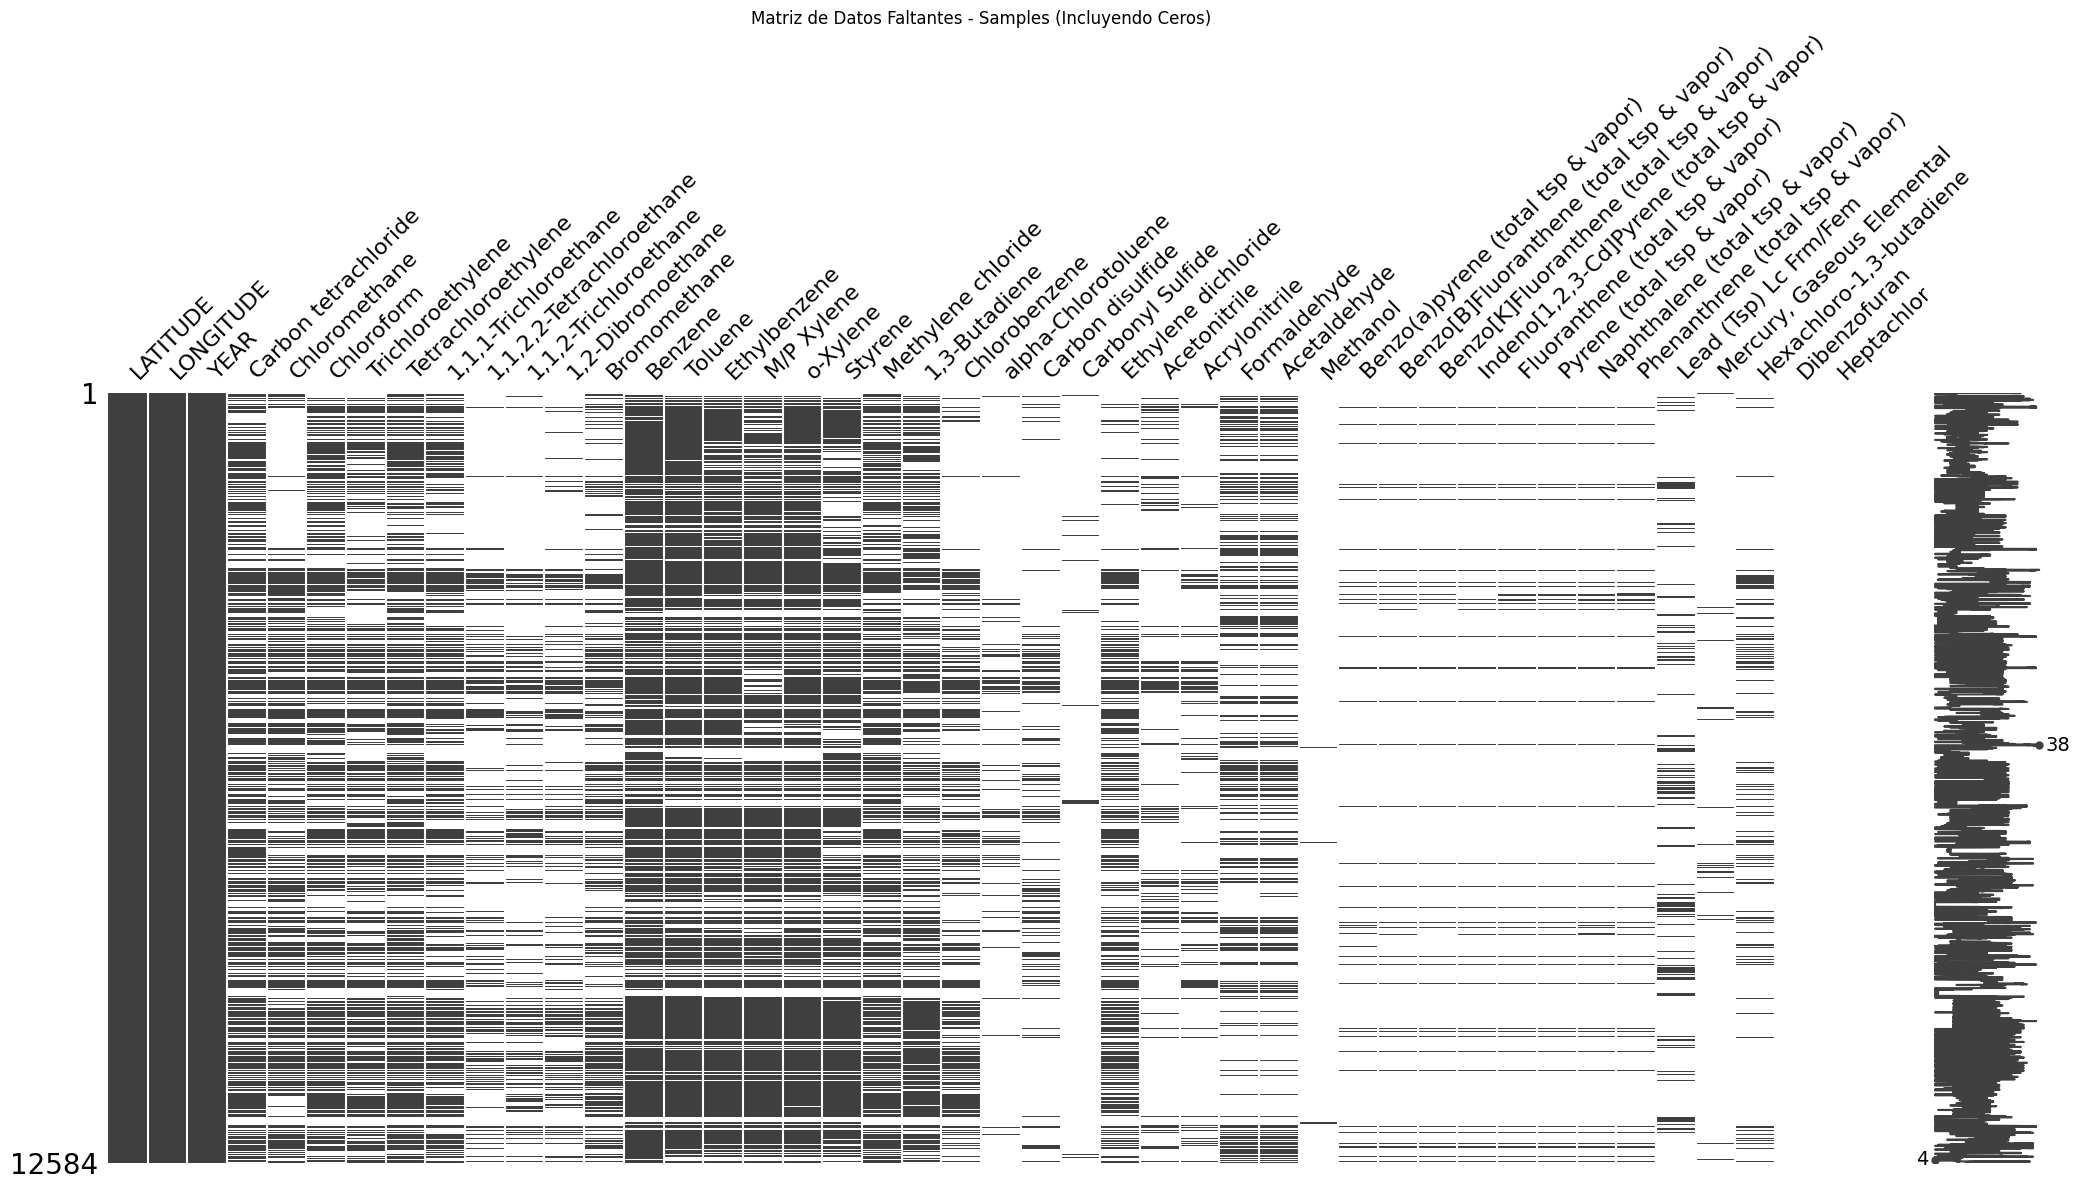

In [7]:
df_visualizacion = df_filtrado_sin_ceros.replace(0, pd.NA)

# Graficar la matriz de datos faltantes
msno.matrix(df_visualizacion)
plt.title("Matriz de Datos Faltantes - Samples (Incluyendo Ceros)")
plt.show()

In [32]:
# Cargar los límites de los países
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Filtrar solo Estados Unidos (continental, sin Alaska ni Hawái)
usa = world[(world.name == "United States of America") & (world.continent == "North America")]

C:\Users\espin\AppData\Local\Temp\ipykernel_15876\2459110285.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


In [33]:
from shapely.geometry import Point

# Convertir a GeoDataFrame
geometry = [Point(xy) for xy in zip(samples_cleaned['LONGITUDE'], samples_cleaned['LATITUDE'])]
samples_eeuu = gpd.GeoDataFrame(samples_cleaned, geometry=geometry, crs="EPSG:4326")
# Filtrar los puntos dentro del área de EE.UU.
samples_eeuu = samples_eeuu[samples_eeuu.within(usa.geometry.iloc[0])]

# Ver los primeros registros después del filtrado
samples_eeuu.head()


STUDY_ID  YEAR  ID_SPECIES  LATITUDE  LONGITUDE  sum.allrawdata.ABUNDANCE  \
0        10  1984          22      47.4     -95.12                       1.0   
1        10  1984          23      47.4     -95.12                       3.0   
2        10  1984          24      47.4     -95.12                       1.0   
3        10  1984         607      47.4     -95.12                      12.0   
4        10  1984        1911      47.4     -95.12                       1.0   

   sum.allrawdata.BIOMASS    GENUS    GENUS_SPECIES  \
0                     0.0     Acer      Acer rubrum   
1                     0.0     Acer   Acer saccharum   
2                     0.0     Acer    Acer spicatum   
3                     0.0  Corylus  Corylus cornuta   
4                     0.0  Populus  Populus pinnata   

                     geometry  
0  POINT (-95.12000 47.40000)  
1  POINT (-95.12000 47.40000)  
2  POINT (-95.12000 47.40000)  
3  POINT (-95.12000 47.40000)  
4  POINT (-95.12000 47.40000)

In [24]:
samples_eeuu.to_csv("C:/Users/espin/Desktop/bdd/Climate-Change-Bio-Bases-main/samples_eeuu.csv", index=False)

### Enlazar contaminación y biodiversidad

#AÑADIR RADIO Y TOMAR PROMEDIO

In [35]:
import pandas as pd
from scipy.spatial import cKDTree
import numpy as np

# Convertir el año a tipo entero
samples_eeuu["YEAR"] = samples_eeuu["YEAR"].astype(int)
df_filtrado_sin_ceros["YEAR"] = df_filtrado_sin_ceros["YEAR"].astype(int)

# Definir el radio de búsqueda en kilómetros
radio_km = 100  
radio_grados = radio_km / 111  # Aproximación de conversión grados ≈ 111 km

datos_enriquecidos = []

for year in samples_eeuu["YEAR"].unique():
    # Filtrar datos solo para ese año
    df_bio_anio = samples_eeuu[samples_eeuu["YEAR"] == year]
    df_cont_anio = df_filtrado_sin_ceros[df_filtrado_sin_ceros["YEAR"] == year]

    if df_cont_anio.empty:
        continue

    # Crear KD-Tree con las coordenadas de los contaminantes
    tree = cKDTree(df_cont_anio[["LATITUDE", "LONGITUDE"]].values)

    # Para cada punto de biodiversidad, encontrar los contaminantes dentro del radio
    indices_por_punto = tree.query_ball_point(df_bio_anio[["LATITUDE", "LONGITUDE"]].values, r=radio_grados)

    # Crear una lista para almacenar los valores promedio de contaminantes
    promedios_contaminantes = []

    for indices in indices_por_punto:
        if indices:
            # Calcular promedio de los contaminantes dentro del radio
            prom_contaminantes = df_cont_anio.iloc[indices].mean()
            prom_contaminantes = prom_contaminantes.where(prom_contaminantes != 0, df_cont_anio.iloc[indices].max())
        else:
            # Si no hay datos en el radio, asignar NaN
            prom_contaminantes = pd.Series(np.nan, index=df_cont_anio.columns)
        
        promedios_contaminantes.append(prom_contaminantes)

    # Convertir a DataFrame y unirlo con el dataset de biodiversidad
    df_promedios = pd.DataFrame(promedios_contaminantes)
    df_bio_anio = df_bio_anio.reset_index(drop=True).join(df_promedios, rsuffix="_contaminantes")

    datos_enriquecidos.append(df_bio_anio)

# Concatenar los resultados finales
df_biodiversidad_final = pd.concat(datos_enriquecidos, ignore_index=True)
df_biodiversidad_final.to_csv("C:/Users/espin/Desktop/bdd/Climate-Change-Bio-Bases-main/samples_enriquecidos_eeuu.csv", index=False)

print("Dataset de biodiversidad enriquecido con el promedio de contaminantes en un radio de 10 km guardado correctamente.")


Dataset de biodiversidad enriquecido con el promedio de contaminantes en un radio de 10 km guardado correctamente.


In [2]:
df_biodiversidad_final=pd.read_csv(("C:/Users/espin/Desktop/bdd/Climate-Change-Bio-Bases-main/samples_enriquecidos_eeuu.csv"))

In [3]:
df_biodiversidad_final.head(10)

STUDY_ID  YEAR  ID_SPECIES  LATITUDE  LONGITUDE  sum.allrawdata.ABUNDANCE  \
0        10  1992          23      47.4     -95.12                       3.0   
1        10  1992         607      47.4     -95.12                       5.0   
2        10  1992        1912      47.4     -95.12                       2.0   
3        10  1992          22      47.4     -95.12                       8.0   
4        10  1992          23      47.4     -95.12                       9.0   
5        10  1992         607      47.4     -95.12                       7.0   
6        10  1992          22      47.4     -95.12                       2.0   
7        10  1992          23      47.4     -95.12                       8.0   
8        10  1992          24      47.4     -95.12                       1.0   
9        10  1992         607      47.4     -95.12                       3.0   

   sum.allrawdata.BIOMASS    GENUS    GENUS_SPECIES             geometry  ...  \
0                     0.0     Acer   Acer saccharum  POINT (-95.12 47.4)  ...   
1                     0.0  Corylus  Corylus cornuta  POINT (-95.12 47.4)  ...   
2                     0.0  Populus       Populus sp  POINT (-95.12 47.4)  ...   
3                     0.0     Acer      Acer rubrum  POINT (-95.12 47.4)  ...   
4                     0.0     Acer   Acer saccharum  POINT (-95.12 47.4)  ...   
5                     0.0  Corylus  Corylus cornuta  POINT (-95.12 47.4)  ...   
6                     0.0     Acer      Acer rubrum  POINT (-95.12 47.4)  ...   
7                     0.0     Acer   Acer saccharum  POINT (-95.12 47.4)  ...   
8                     0.0     Acer    Acer spicatum  POINT (-95.12 47.4)  ...   
9                     0.0  Corylus  Corylus cornuta  POINT (-95.12 47.4)  ...   

   Indeno[1,2,3-Cd]Pyrene (total tsp & vapor)  \
0                                         NaN   
1                                         NaN   
2                                         NaN   
3                                         NaN   
4                                         NaN   
5                                         NaN   
6                                         NaN   
7                                         NaN   
8                                         NaN   
9                                         NaN   

   Fluoranthene (total tsp & vapor)  Pyrene (total tsp & vapor)  \
0                               NaN                         NaN   
1                               NaN                         NaN   
2                               NaN                         NaN   
3                               NaN                         NaN   
4                               NaN                         NaN   
5                               NaN                         NaN   
6                               NaN                         NaN   
7                               NaN                         NaN   
8                               NaN                         NaN   
9                               NaN                         NaN   

   Naphthalene (total tsp & vapor)  Phenanthrene (total tsp & vapor)  \
0                              NaN                               NaN   
1                              NaN                               NaN   
2                              NaN                               NaN   
3                              NaN                               NaN   
4                              NaN                               NaN   
5                              NaN                               NaN   
6                              NaN                               NaN   
7                              NaN                               NaN   
8                              NaN                               NaN   
9                              NaN                               NaN   

   Lead (Tsp) Lc Frm/Fem  Mercury, Gaseous Elemental  \
0                    NaN                         NaN   
1                    NaN                       

In [4]:
df_biodiversidad_final = df_biodiversidad_final.fillna(0)

In [5]:
df_biodiversidad_final.head(10)

STUDY_ID  YEAR  ID_SPECIES  LATITUDE  LONGITUDE  sum.allrawdata.ABUNDANCE  \
0        10  1992          23      47.4     -95.12                       3.0   
1        10  1992         607      47.4     -95.12                       5.0   
2        10  1992        1912      47.4     -95.12                       2.0   
3        10  1992          22      47.4     -95.12                       8.0   
4        10  1992          23      47.4     -95.12                       9.0   
5        10  1992         607      47.4     -95.12                       7.0   
6        10  1992          22      47.4     -95.12                       2.0   
7        10  1992          23      47.4     -95.12                       8.0   
8        10  1992          24      47.4     -95.12                       1.0   
9        10  1992         607      47.4     -95.12                       3.0   

   sum.allrawdata.BIOMASS    GENUS    GENUS_SPECIES             geometry  ...  \
0                     0.0     Acer   Acer saccharum  POINT (-95.12 47.4)  ...   
1                     0.0  Corylus  Corylus cornuta  POINT (-95.12 47.4)  ...   
2                     0.0  Populus       Populus sp  POINT (-95.12 47.4)  ...   
3                     0.0     Acer      Acer rubrum  POINT (-95.12 47.4)  ...   
4                     0.0     Acer   Acer saccharum  POINT (-95.12 47.4)  ...   
5                     0.0  Corylus  Corylus cornuta  POINT (-95.12 47.4)  ...   
6                     0.0     Acer      Acer rubrum  POINT (-95.12 47.4)  ...   
7                     0.0     Acer   Acer saccharum  POINT (-95.12 47.4)  ...   
8                     0.0     Acer    Acer spicatum  POINT (-95.12 47.4)  ...   
9                     0.0  Corylus  Corylus cornuta  POINT (-95.12 47.4)  ...   

   Indeno[1,2,3-Cd]Pyrene (total tsp & vapor)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   
5                                         0.0   
6                                         0.0   
7                                         0.0   
8                                         0.0   
9                                         0.0   

   Fluoranthene (total tsp & vapor)  Pyrene (total tsp & vapor)  \
0                               0.0                         0.0   
1                               0.0                         0.0   
2                               0.0                         0.0   
3                               0.0                         0.0   
4                               0.0                         0.0   
5                               0.0                         0.0   
6                               0.0                         0.0   
7                               0.0                         0.0   
8                               0.0                         0.0   
9                               0.0                         0.0   

   Naphthalene (total tsp & vapor)  Phenanthrene (total tsp & vapor)  \
0                              0.0                               0.0   
1                              0.0                               0.0   
2                              0.0                               0.0   
3                              0.0                               0.0   
4                              0.0                               0.0   
5                              0.0                               0.0   
6                              0.0                               0.0   
7                              0.0                               0.0   
8                              0.0                               0.0   
9                              0.0                               0.0   

   Lead (Tsp) Lc Frm/Fem  Mercury, Gaseous Elemental  \
0                    0.0                         0.0   
1                    0.0                       

In [6]:
print(df_biodiversidad_final.columns.tolist())

['STUDY_ID', 'YEAR', 'ID_SPECIES', 'LATITUDE', 'LONGITUDE', 'sum.allrawdata.ABUNDANCE', 'sum.allrawdata.BIOMASS', 'GENUS', 'GENUS_SPECIES', 'geometry', 'LATITUDE_contaminantes', 'LONGITUDE_contaminantes', 'YEAR_contaminantes', 'Carbon tetrachloride', 'Chloromethane', 'Chloroform', 'Trichloroethylene', 'Tetrachloroethylene', '1,1,1-Trichloroethane', '1,1,2,2-Tetrachloroethane', '1,1,2-Trichloroethane', '1,2-Dibromoethane', 'Bromomethane', 'Benzene', 'Toluene', 'Ethylbenzene', 'M/P Xylene', 'o-Xylene', 'Styrene', 'Methylene chloride', '1,3-Butadiene', 'Chlorobenzene', 'alpha-Chlorotoluene', 'Carbon disulfide', 'Carbonyl Sulfide', 'Ethylene dichloride', 'Acetonitrile', 'Acrylonitrile', 'Formaldehyde', 'Acetaldehyde', 'Methanol', 'Benzo(a)pyrene (total tsp & vapor)', 'Benzo[B]Fluoranthene (total tsp & vapor)', 'Benzo[K]Fluoranthene (total tsp & vapor)', 'Indeno[1,2,3-Cd]Pyrene (total tsp & vapor)', 'Fluoranthene (total tsp & vapor)', 'Pyrene (total tsp & vapor)', 'Naphthalene (total tsp & 

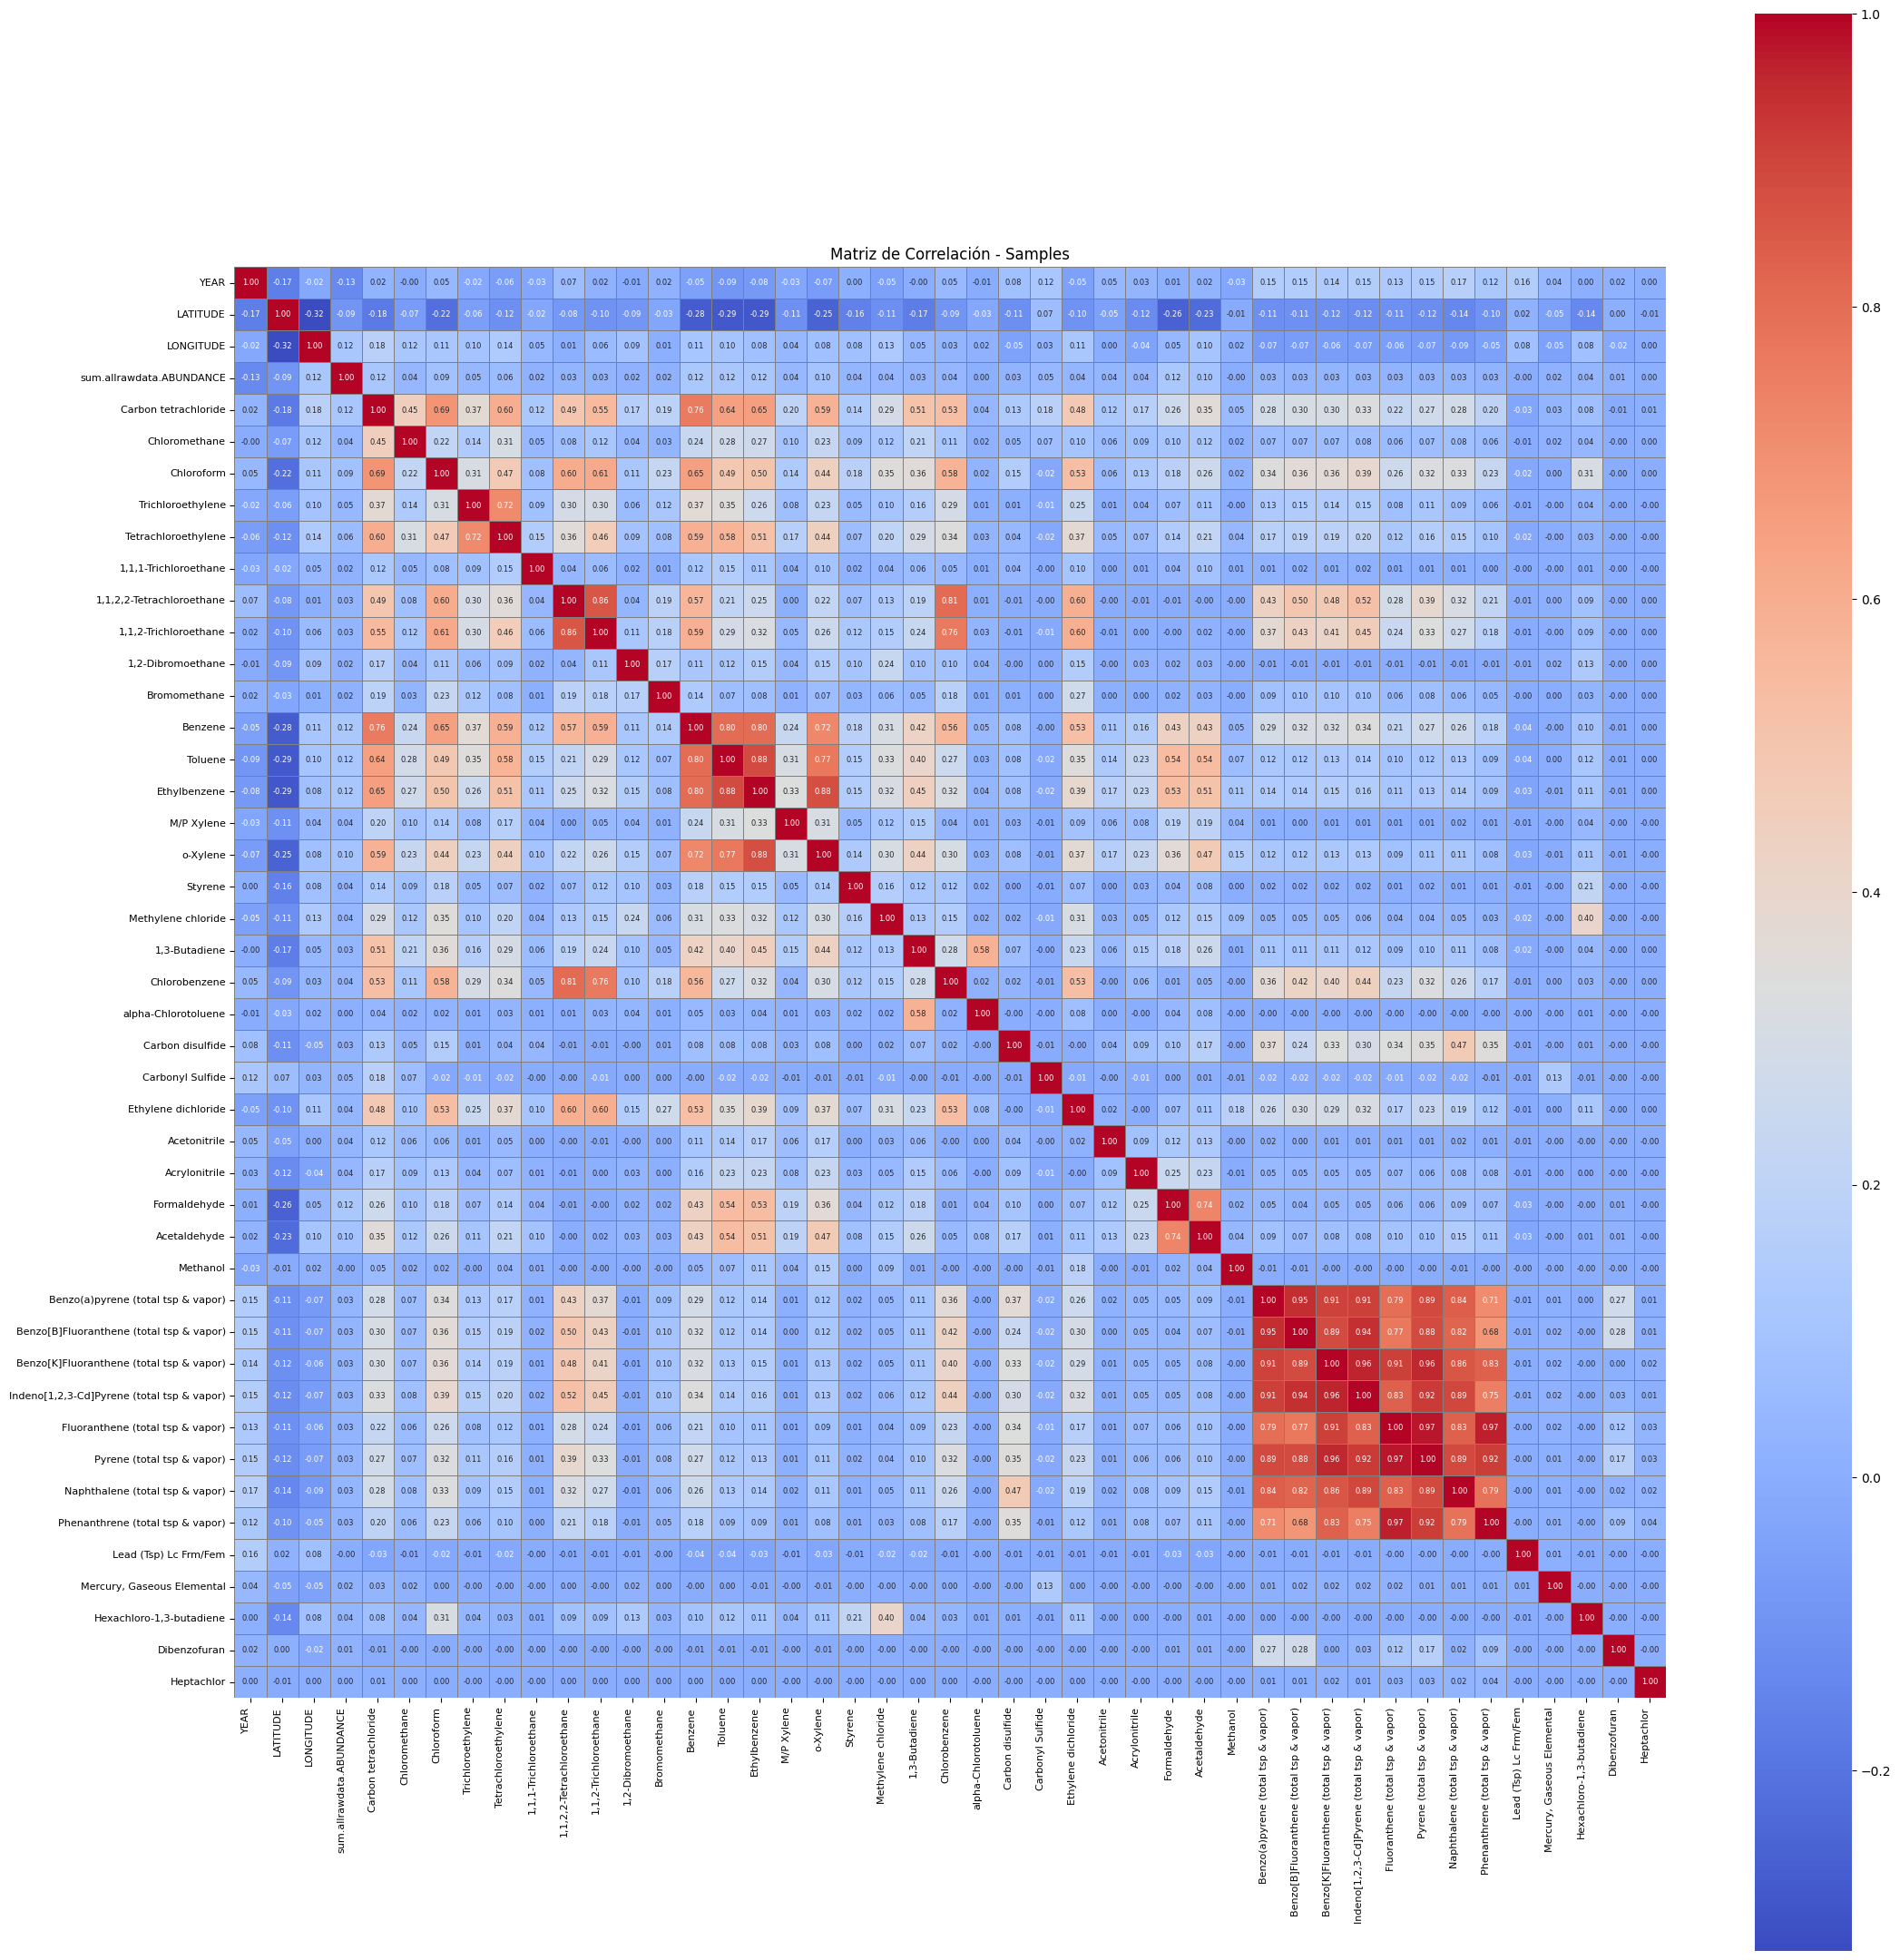

In [7]:
numeric_cols = ['YEAR', 'LATITUDE', 'LONGITUDE', 'sum.allrawdata.ABUNDANCE','Carbon tetrachloride', 'Chloromethane', 'Chloroform', 'Trichloroethylene', 'Tetrachloroethylene', '1,1,1-Trichloroethane', '1,1,2,2-Tetrachloroethane', '1,1,2-Trichloroethane', '1,2-Dibromoethane', 'Bromomethane', 'Benzene', 'Toluene', 'Ethylbenzene', 'M/P Xylene', 'o-Xylene', 'Styrene', 'Methylene chloride', '1,3-Butadiene', 'Chlorobenzene', 'alpha-Chlorotoluene', 'Carbon disulfide', 'Carbonyl Sulfide', 'Ethylene dichloride', 'Acetonitrile', 'Acrylonitrile', 'Formaldehyde', 'Acetaldehyde', 'Methanol', 'Benzo(a)pyrene (total tsp & vapor)', 'Benzo[B]Fluoranthene (total tsp & vapor)', 'Benzo[K]Fluoranthene (total tsp & vapor)', 'Indeno[1,2,3-Cd]Pyrene (total tsp & vapor)', 'Fluoranthene (total tsp & vapor)', 'Pyrene (total tsp & vapor)', 'Naphthalene (total tsp & vapor)', 'Phenanthrene (total tsp & vapor)', 'Lead (Tsp) Lc Frm/Fem', 'Mercury, Gaseous Elemental', 'Hexachloro-1,3-butadiene', 'Dibenzofuran', 'Heptachlor']
corr = df_biodiversidad_final[numeric_cols].corr()
fig, ax = plt.subplots(figsize=(len(numeric_cols)*0.5 , len(numeric_cols)*0.5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", annot_kws={"size": 6},
            linewidths=0.5, linecolor="gray", square=True, ax=ax)
plt.xticks(rotation=90, ha="right", fontsize=8)  # Rotamos más para evitar solapamientos
plt.yticks(fontsize=8)
plt.title("Matriz de Correlación - Samples")
plt.tight_layout()
plt.show()

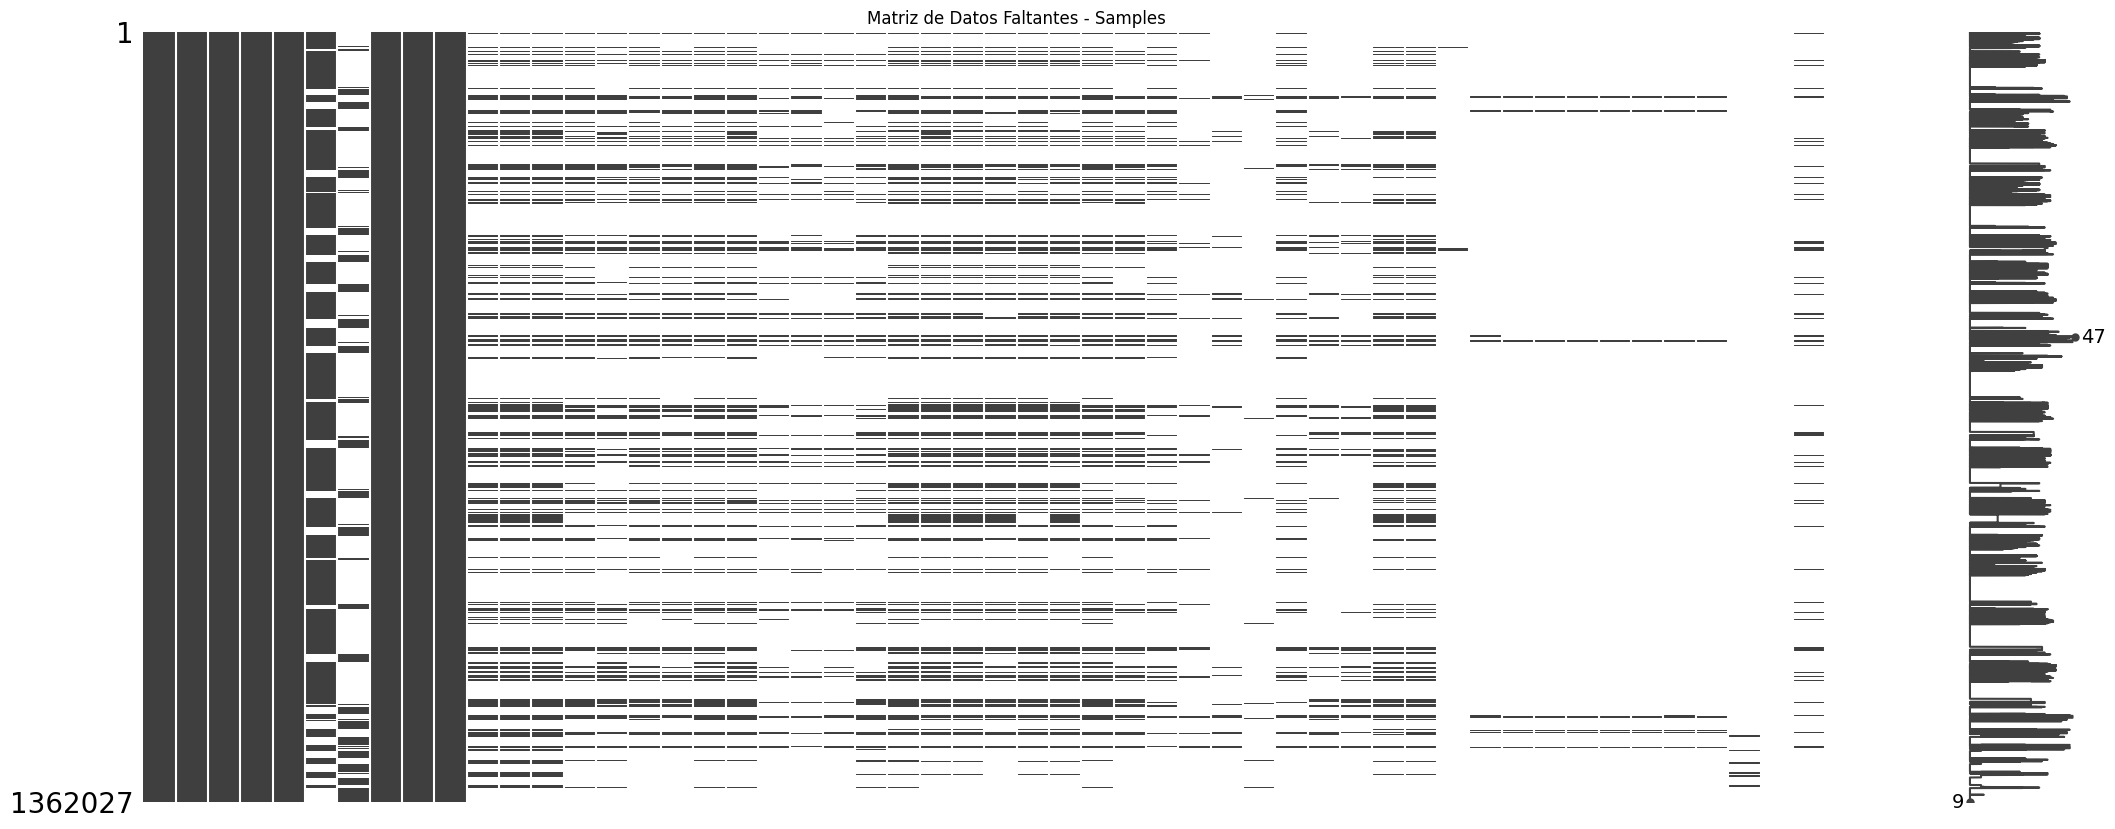

In [8]:
df_visualizacion = df_biodiversidad_final.replace(0, pd.NA)
msno.matrix(df_visualizacion)
plt.title("Matriz de Datos Faltantes - Samples")
plt.show() 

In [9]:
print(df_visualizacion.isna().sum())

STUDY_ID                                            0
YEAR                                                0
ID_SPECIES                                          0
LATITUDE                                            0
LONGITUDE                                           0
sum.allrawdata.ABUNDANCE                       291729
sum.allrawdata.BIOMASS                        1043970
GENUS                                               0
GENUS_SPECIES                                       0
geometry                                            0
LATITUDE_contaminantes                         972160
LONGITUDE_contaminantes                        972160
YEAR_contaminantes                             972160
Carbon tetrachloride                          1075447
Chloromethane                                 1122988
Chloroform                                    1105343
Trichloroethylene                             1127442
Tetrachloroethylene                           1076342
1,1,1-Trichloroethane       

In [16]:
delete_columns=["sum.allrawdata.BIOMASS",	"GENUS",	"GENUS_SPECIES","ID_SPECIES"	,"geometry",	"LATITUDE_contaminantes",	"LONGITUDE_contaminantes",	"YEAR_contaminantes"]
df_biodiversidad_final2=df_biodiversidad_final.drop(columns=delete_columns, errors='ignore')

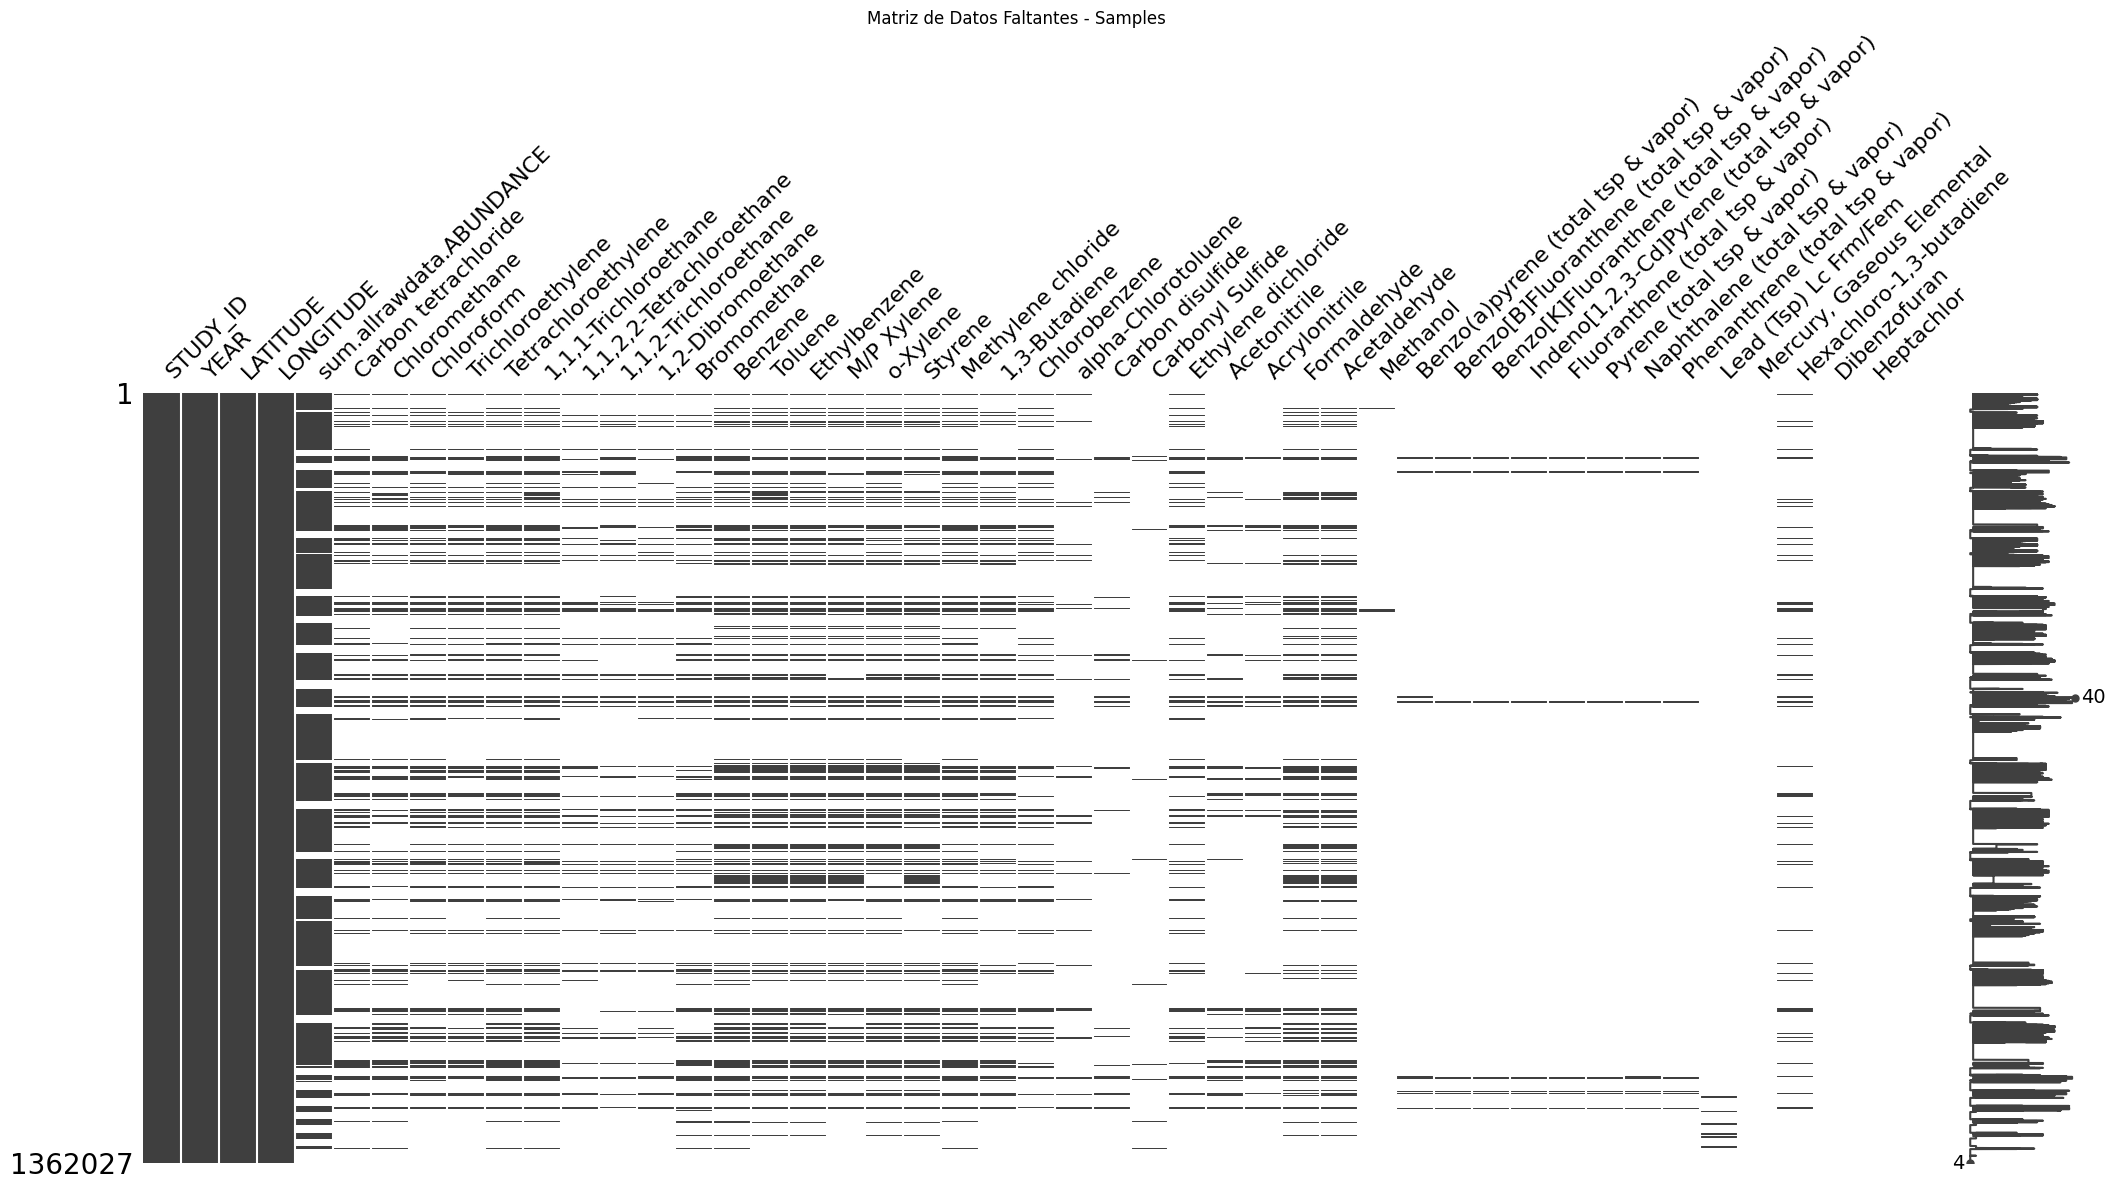

In [17]:
df_visualizacion = df_biodiversidad_final2.replace(0, pd.NA)
msno.matrix(df_visualizacion)
plt.title("Matriz de Datos Faltantes - Samples")
plt.show()  

In [18]:
df_biodiversidad_final2 = df_biodiversidad_final2.replace(0, pd.NaT)
df_biodiversidad_final2 = df_biodiversidad_final2.dropna(how="all", subset=['Carbon tetrachloride', 'Chloromethane', 'Chloroform', 'Trichloroethylene', 'Tetrachloroethylene', '1,1,1-Trichloroethane', '1,1,2,2-Tetrachloroethane', '1,1,2-Trichloroethane', '1,2-Dibromoethane', 'Bromomethane', 'Benzene', 'Toluene', 'Ethylbenzene', 'M/P Xylene', 'o-Xylene', 'Styrene', 'Methylene chloride', '1,3-Butadiene', 'Chlorobenzene', 'alpha-Chlorotoluene', 'Carbon disulfide', 'Carbonyl Sulfide', 'Ethylene dichloride', 'Acetonitrile', 'Acrylonitrile', 'Formaldehyde', 'Acetaldehyde', 'Methanol', 'Benzo(a)pyrene (total tsp & vapor)', 'Benzo[B]Fluoranthene (total tsp & vapor)', 'Benzo[K]Fluoranthene (total tsp & vapor)', 'Indeno[1,2,3-Cd]Pyrene (total tsp & vapor)', 'Fluoranthene (total tsp & vapor)', 'Pyrene (total tsp & vapor)', 'Naphthalene (total tsp & vapor)', 'Phenanthrene (total tsp & vapor)', 'Lead (Tsp) Lc Frm/Fem', 'Mercury, Gaseous Elemental', 'Hexachloro-1,3-butadiene', 'Dibenzofuran', 'Heptachlor'])
biodiversidad_final2 = df_biodiversidad_final2.fillna(0)

biodiversidad_final2.head()

C:\Users\espin\AppData\Local\Temp\ipykernel_16524\3280308148.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  biodiversidad_final2 = df_biodiversidad_final2.fillna(0)


STUDY_ID  YEAR  LATITUDE  LONGITUDE  sum.allrawdata.ABUNDANCE  \
872       162  1992    30.300    -90.435                       1.0   
873       162  1992    30.300    -90.435                       1.0   
874       162  1992    30.300    -90.435                       1.0   
875       162  1992    30.300    -90.435                       1.0   
901       162  1992    29.939    -93.275                       1.0   

     Carbon tetrachloride  Chloromethane  Chloroform  Trichloroethylene  \
872              1.415542       0.762000    0.854462           0.107477   
873              1.415542       0.762000    0.854462           0.107477   
874              1.415542       0.762000    0.854462           0.107477   
875              1.415542       0.762000    0.854462           0.107477   
901              1.553052       0.291171    0.392704           0.230308   

     Tetrachloroethylene  ...  Indeno[1,2,3-Cd]Pyrene (total tsp & vapor)  \
872             0.888501  ...                                         0.0   
873             0.888501  ...                                         0.0   
874             0.888501  ...                                         0.0   
875             0.888501  ...                                         0.0   
901             1.166258  ...                                         0.0   

     Fluoranthene (total tsp & vapor)  Pyrene (total tsp & vapor)  \
872                               0.0                         0.0   
873                               0.0                         0.0   
874                               0.0                         0.0   
875                               0.0                         0.0   
901                               0.0                         0.0   

     Naphthalene (total tsp & vapor)  Phenanthrene (total tsp & vapor)  \
872                              0.0                               0.0   
873                              0.0                               0.0   
874                              0.0                               0.0   
875                              0.0                               0.0   
901                              0.0                               0.0   

     Lead (Tsp) Lc Frm/Fem  Mercury, Gaseous Elemental  \
872                    0.0                         0.0   
873                    0.0                         0.0   
874                    0.0                         0.0   
875                    0.0                         0.0   
901                    0.0                         0.0   

     Hexachloro-1,3-butadiene  Dibenzofuran  Heptachlor  
872                       0.0           0.0         0.0  
873                       0.0           0.0         0.0  
874                       0.0           0.0         0.0  
875                       0.0           0.0         0.0  
901                       0.0           0.0         0.0  

[5 rows x 46 columns]

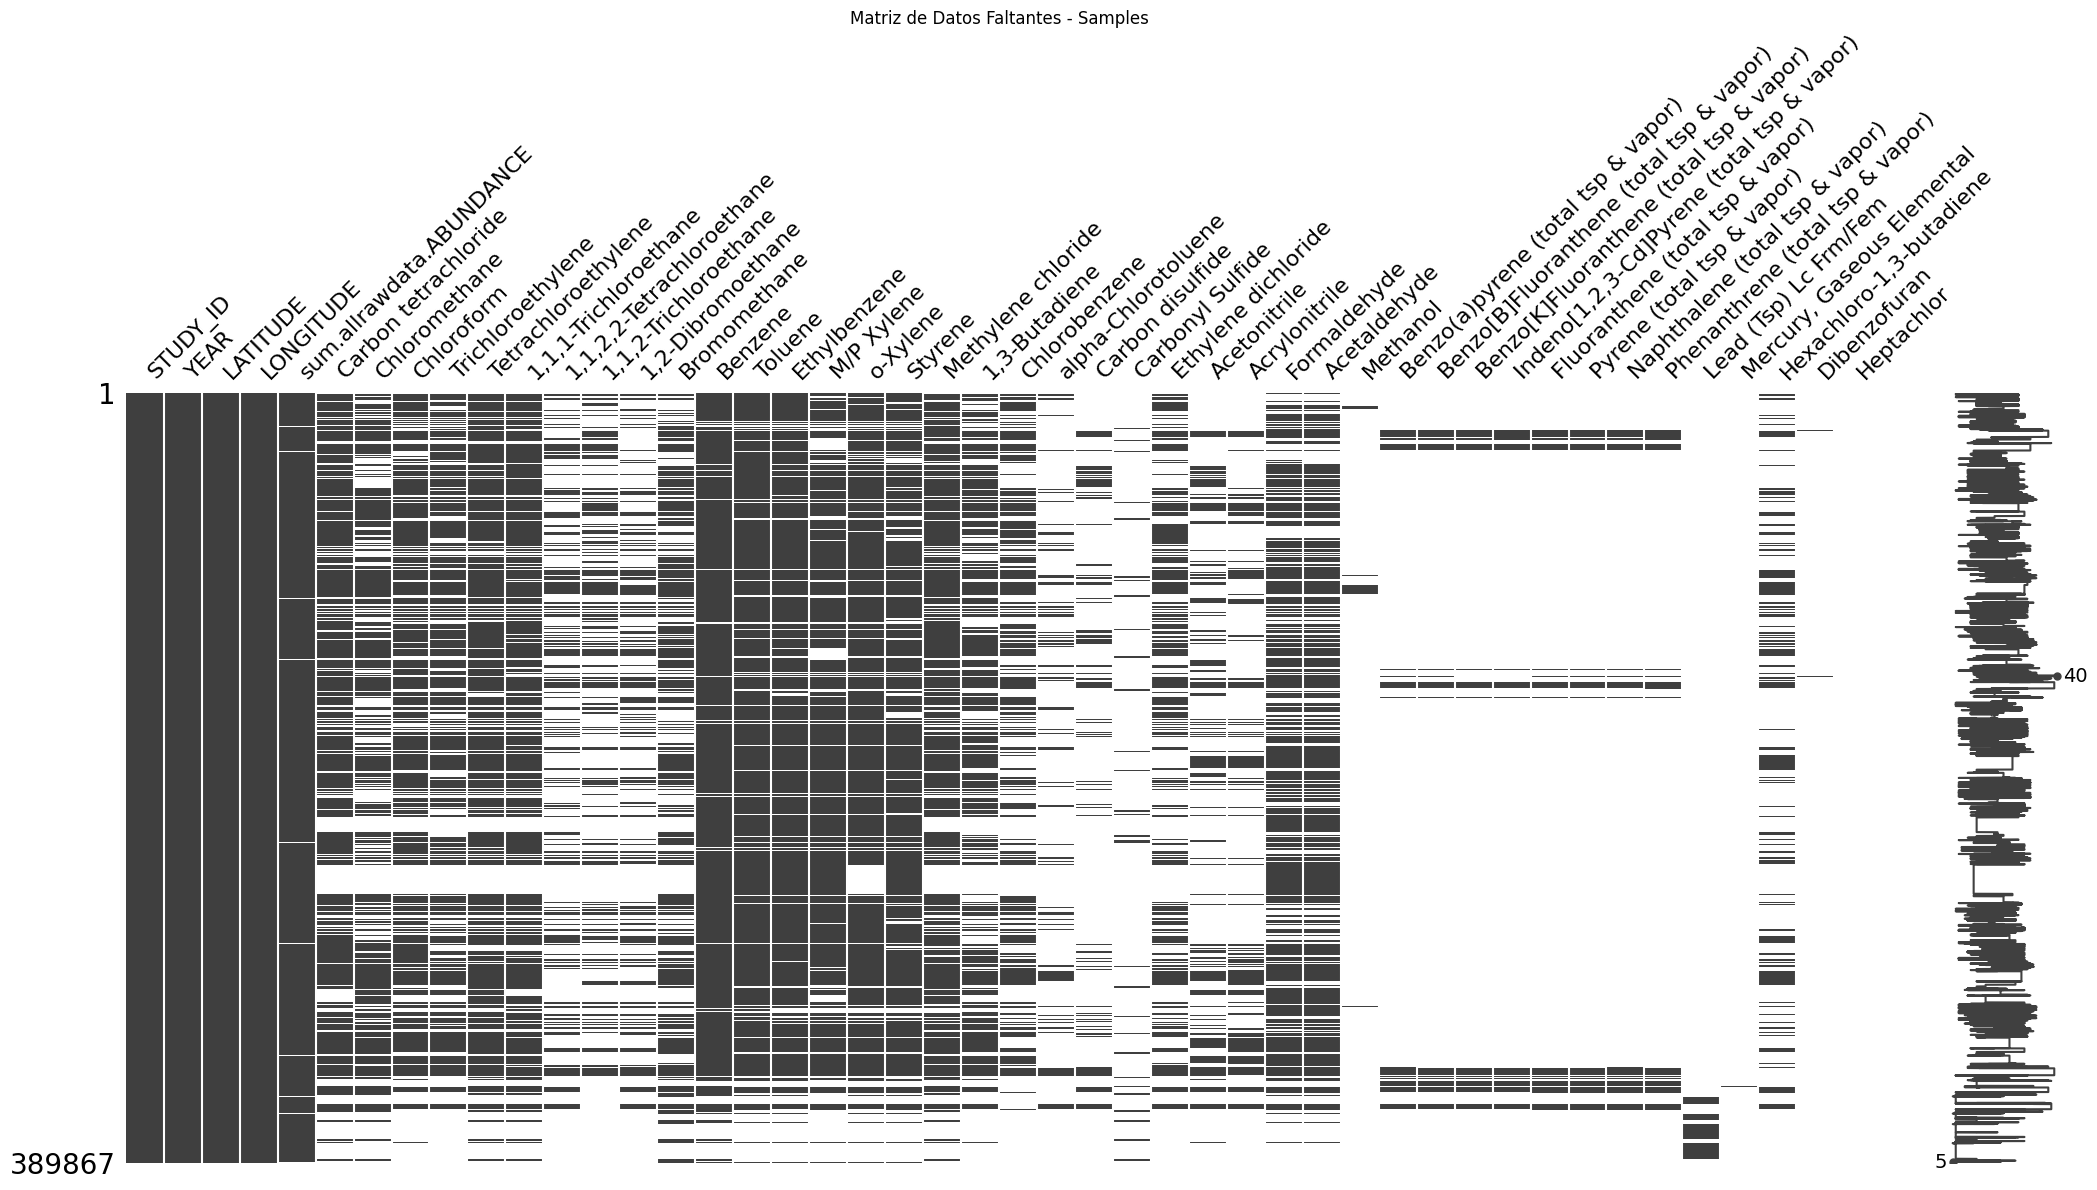

In [19]:
df_visualizacion = df_biodiversidad_final2.replace(0, pd.NA)
msno.matrix(df_visualizacion)
plt.title("Matriz de Datos Faltantes - Samples")
plt.show()  

In [23]:
df_biodiversidad_final2 = df_biodiversidad_final2.groupby(["LATITUDE", "LONGITUDE", "YEAR"], as_index=False).agg({
    "sum.allrawdata.ABUNDANCE": "mean",
    **{col: "mean" for col in df_biodiversidad_final2.columns if col not in ["LATITUDE", "LONGITUDE", "YEAR", "sum.allrawdata.ABUNDANCE"]}
})

df_biodiversidad_final2.head(10000)

LATITUDE  LONGITUDE  YEAR sum.allrawdata.ABUNDANCE  STUDY_ID  \
0      18.9220   -155.684  2005                 2.142857     120.0   
1      18.9390   -155.688  2005                      1.2     120.0   
2      18.9390   -155.688  2008                      2.0     122.0   
3      18.9685   -155.731  2010                 2.551724     122.0   
4      18.9686   -155.731  2006                 3.222222     120.0   
...        ...        ...   ...                      ...       ...   
9995   36.7157   -119.116  1993                      1.0     169.0   
9996   36.7157   -119.115  2003                      2.0     169.0   
9997   36.7166   -121.999  2005                      1.0     169.0   
9998   36.7170   -120.319  1994                      2.0     169.0   
9999   36.7181   -120.741  2006                      1.0     169.0   

     Carbon tetrachloride Chloromethane Chloroform Trichloroethylene  \
0                0.598315      1.153032        NaN               NaN   
1                0.598315      1.153032        NaN               NaN   
2                0.577913      1.156355        NaN               NaN   
3                0.562907      1.172307        NaN               NaN   
4                0.591838       1.14593        NaN               NaN   
...                   ...           ...        ...               ...   
9995             0.691584           NaN   0.089433          0.078124   
9996             0.617198           NaN   0.151117           0.01283   
9997             0.672737           NaN   0.107374          0.074884   
9998             0.668706           NaN   0.080081          0.074821   
9999                  NaN           NaN        NaN               NaN   

     Tetrachloroethylene  ... Indeno[1,2,3-Cd]Pyrene (total tsp & vapor)  \
0               0.013123  ...                                        NaN   
1               0.013123  ...                                        NaN   
2               0.011791  ...                                        NaN   
3               0.010878  ...                                        NaN   
4               0.012228  ...                                        NaN   
...                  ...  ...                                        ...   
9995            0.685139  ...                                        NaN   
9996            0.214365  ...                                        NaN   
9997            0.229357  ...                                        NaN   
9998            0.437896  ...                                        NaN   
9999                 NaN  ...                                        NaN   

     Fluoranthene (total tsp & vapor) Pyrene (total tsp & vapor)  \
0                                 NaN                        NaN   
1                                 NaN                        NaN   
2                                 NaN                        NaN   
3                                 NaN                        NaN   
4                                 NaN                        NaN   
...                               ...                        ...   
9995                              NaN                        NaN   
9996                              NaN                        NaN   
9997                              NaN                        NaN   
9998                              NaN                        NaN   
9999                              NaN                        NaN   

     Naphthalene (total tsp & vapor) Phenanthrene (total tsp & vapor)  \
0                                NaN                              NaN   
1                                NaN                              NaN   
2                                NaN                              NaN   
3                                NaN                              NaN   
4                                NaN                              NaN   
...                              ...                              ...   
9995                             NaN                       

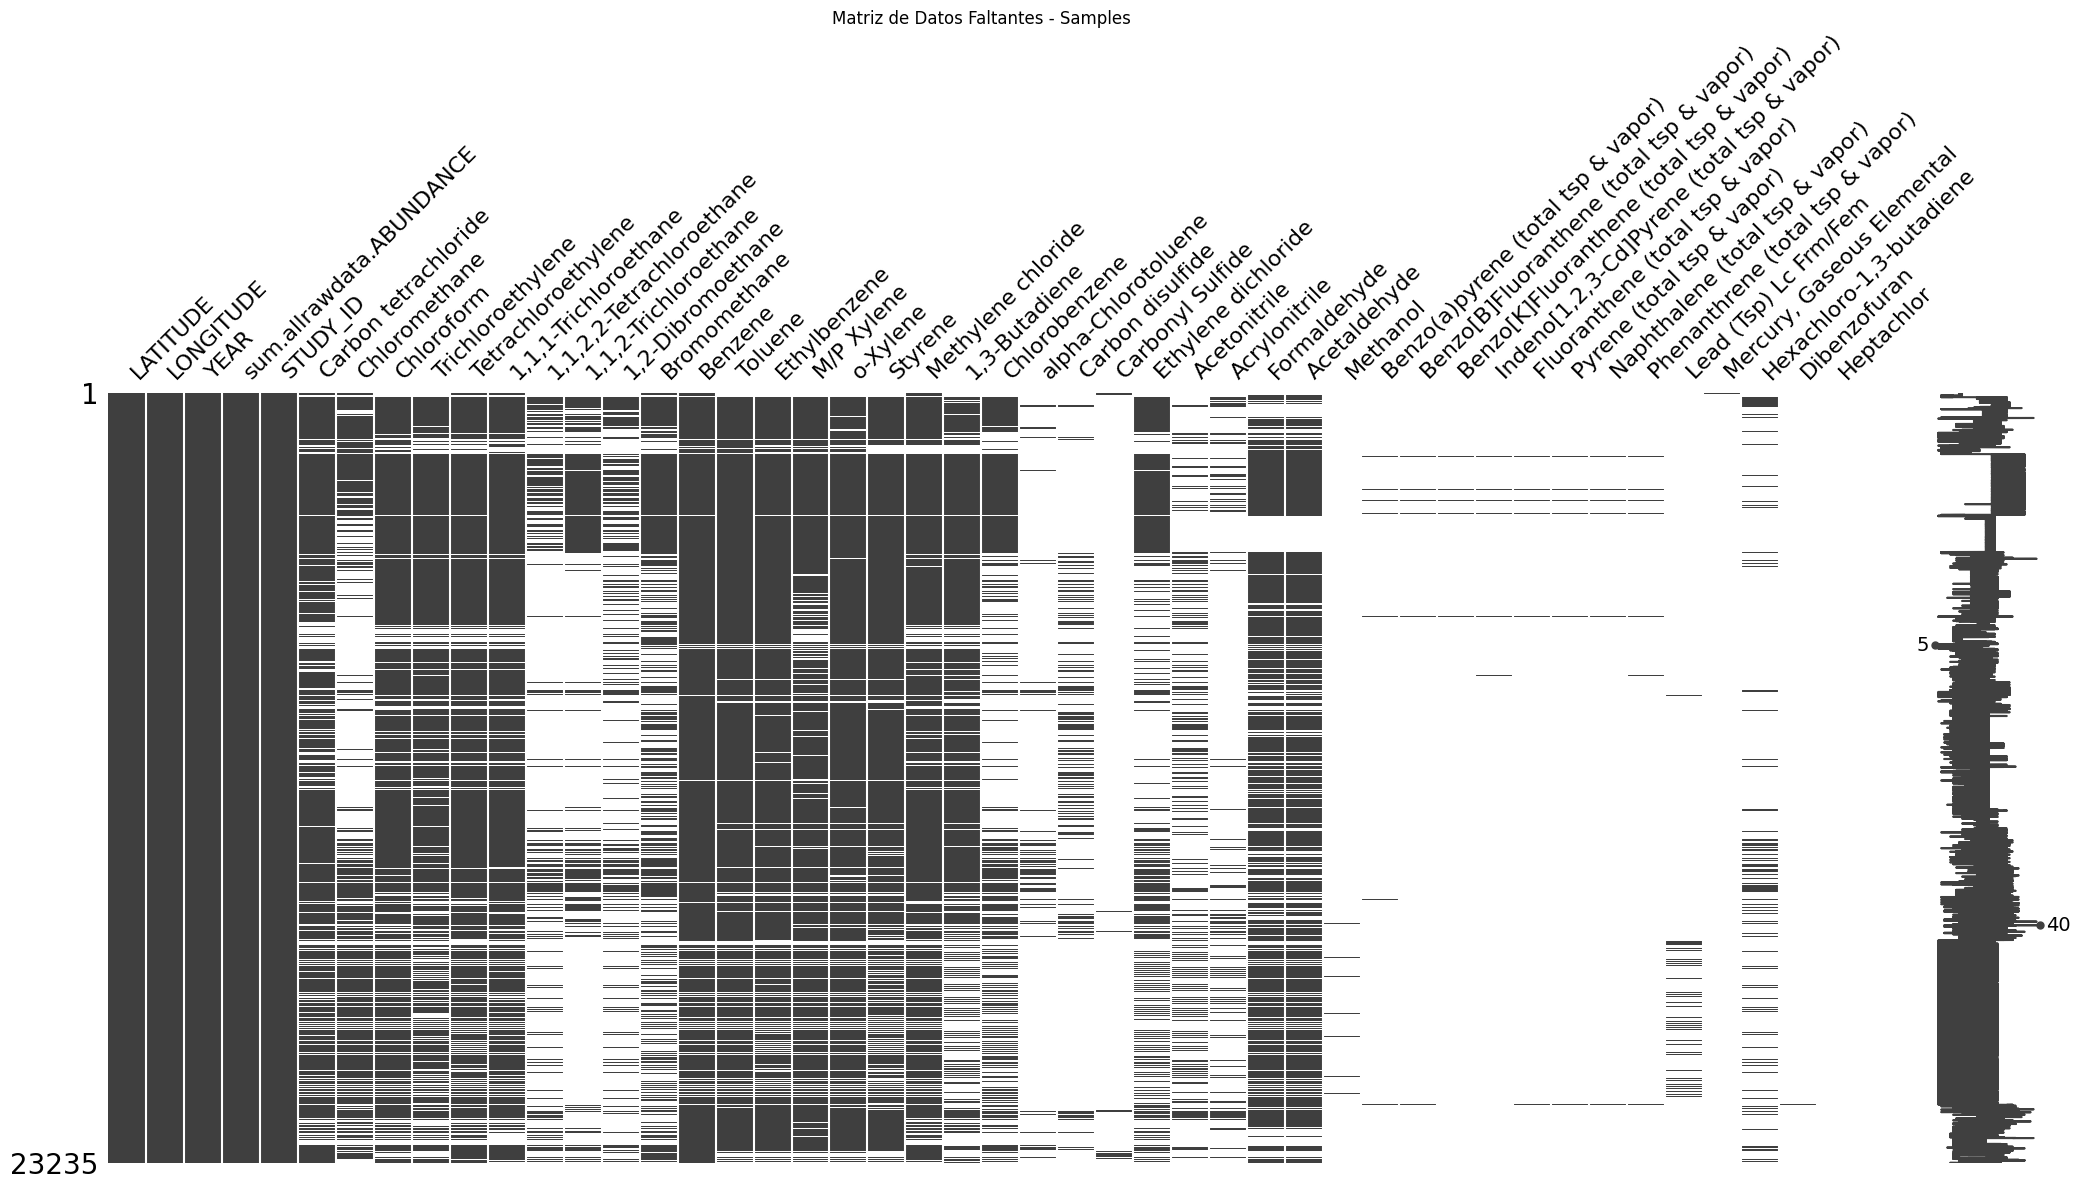

In [24]:
df_visualizacion = df_biodiversidad_final2.replace(0, pd.NA)
msno.matrix(df_visualizacion)
plt.title("Matriz de Datos Faltantes - Samples")
plt.show()

In [25]:
df_biodiversidad_final2.to_csv("C:/Users/espin/Desktop/bdd/Climate-Change-Bio-Bases-main/contaminates_biodiversidad_sin_ceros_agrupados.csv", index=False)

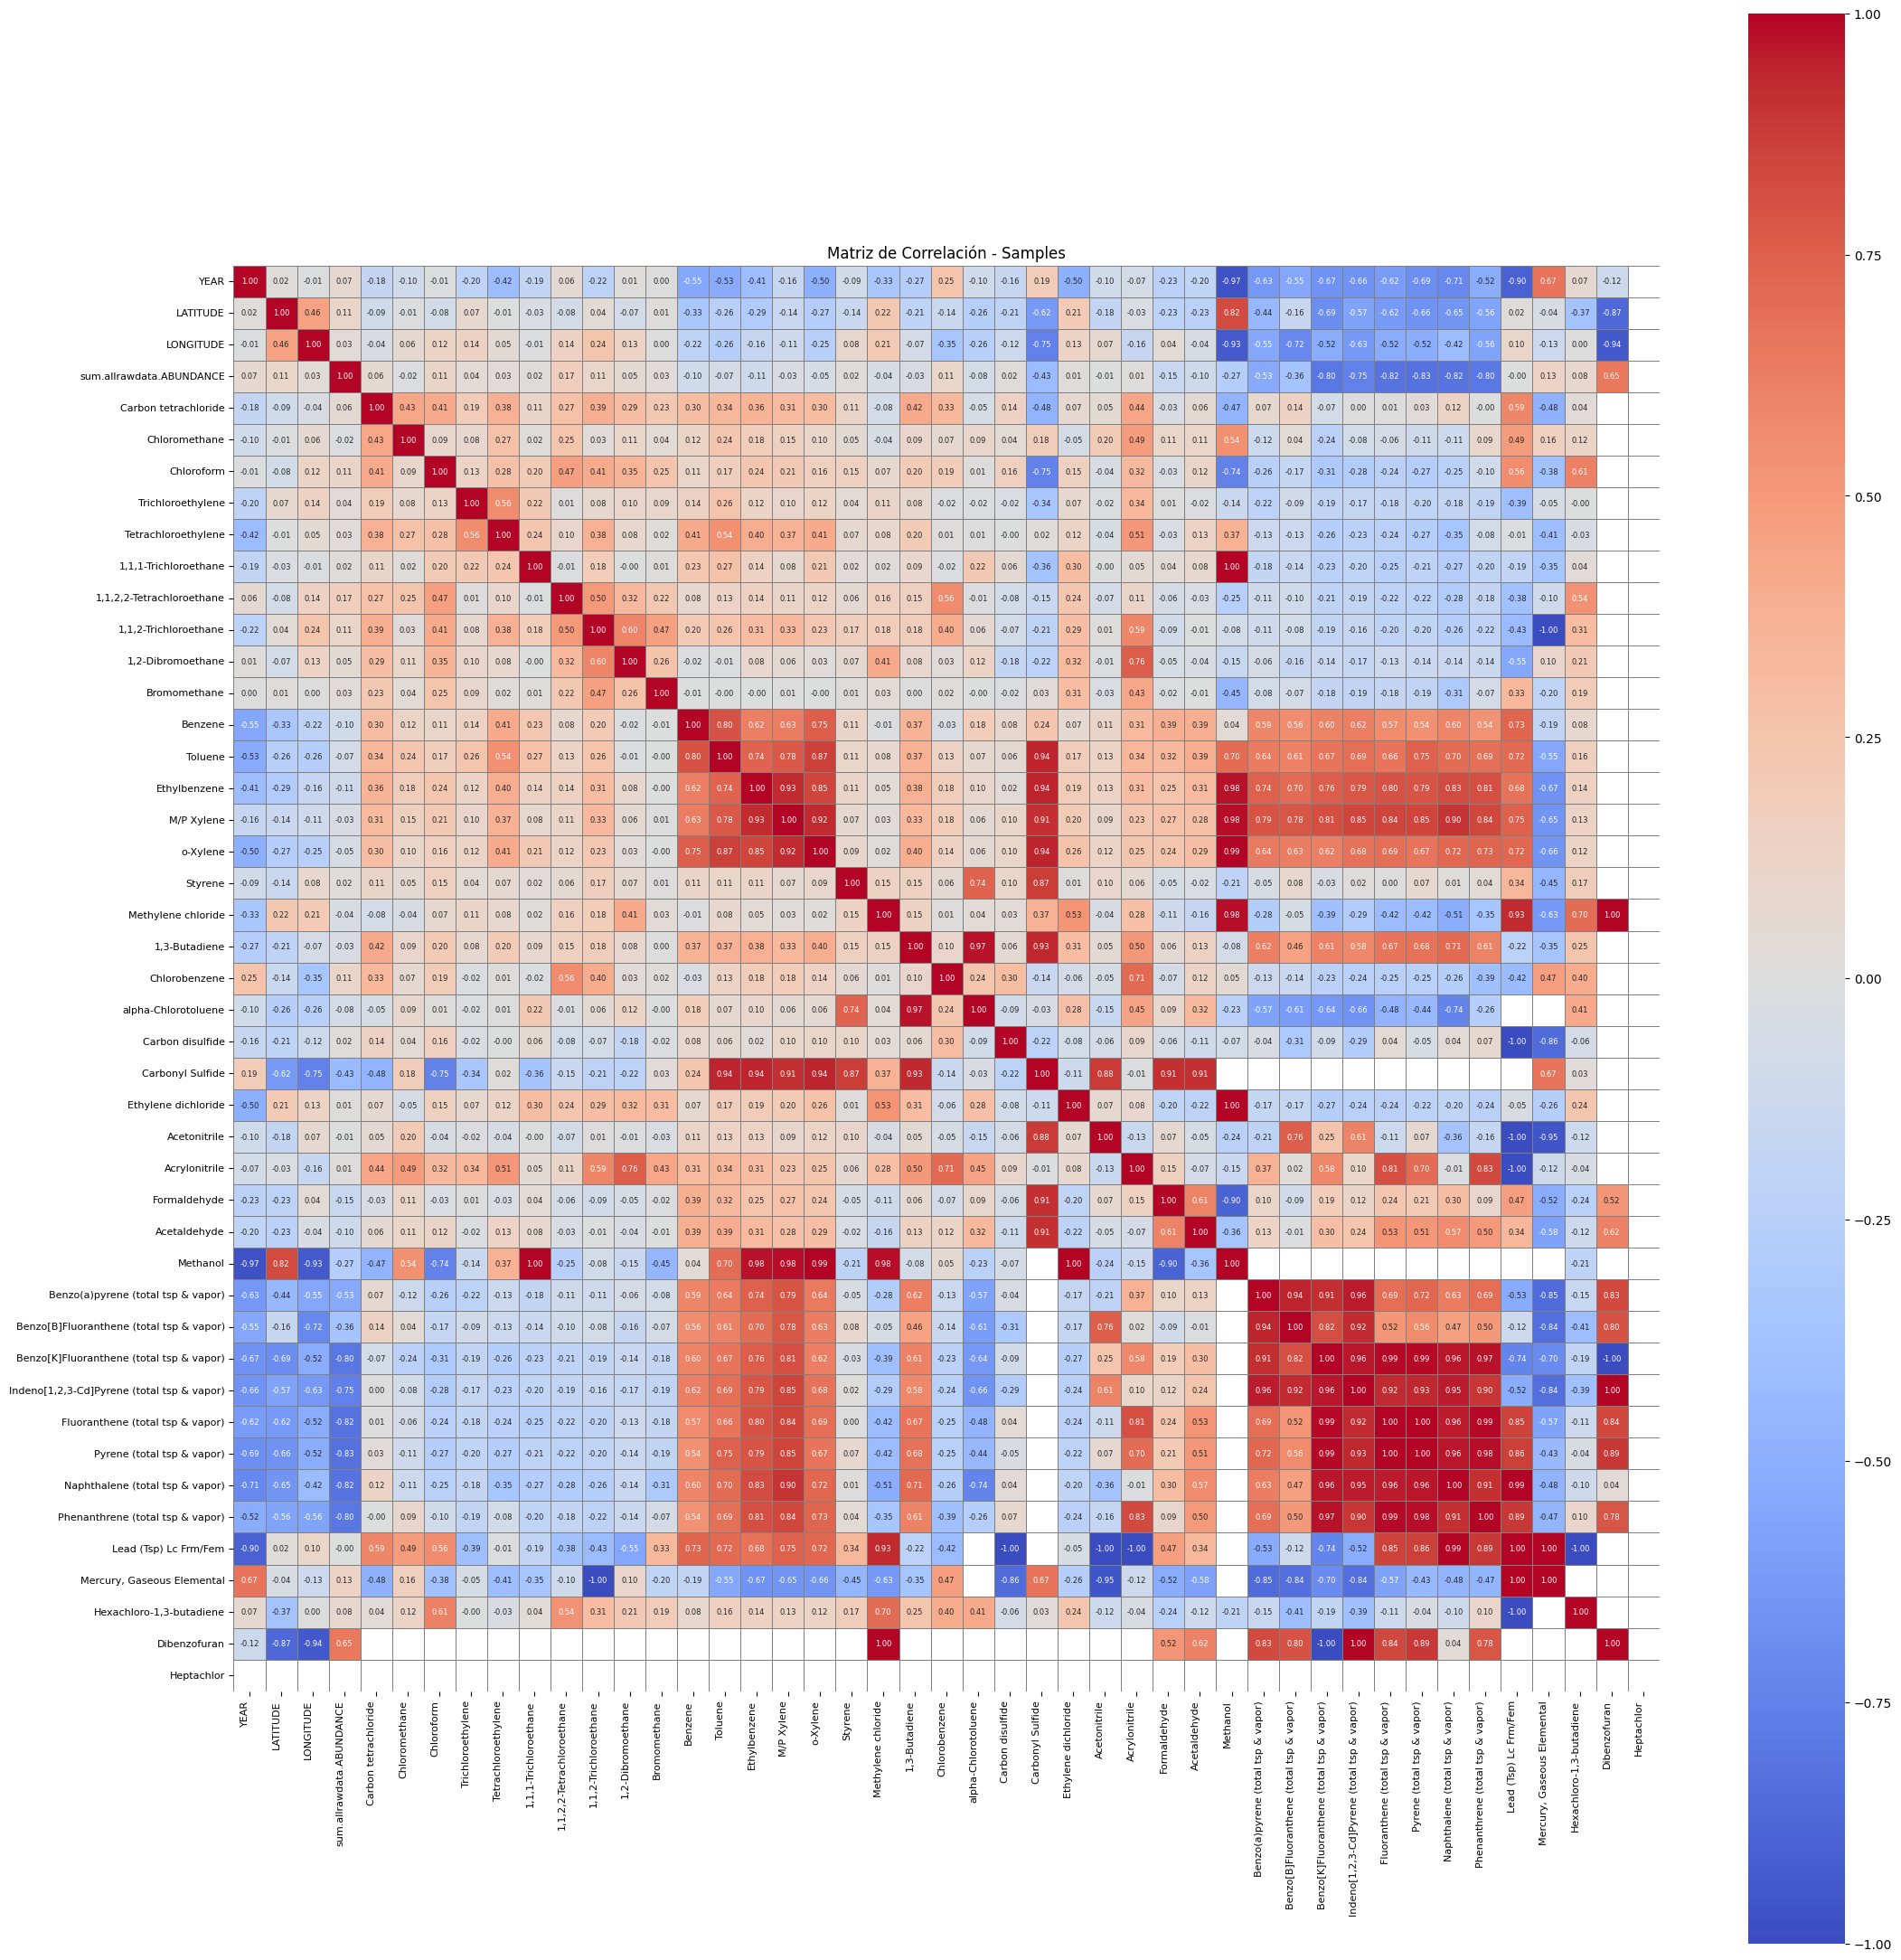

In [26]:
numeric_cols = ['YEAR', 'LATITUDE', 'LONGITUDE', 'sum.allrawdata.ABUNDANCE','Carbon tetrachloride', 'Chloromethane', 'Chloroform', 'Trichloroethylene', 'Tetrachloroethylene', '1,1,1-Trichloroethane', '1,1,2,2-Tetrachloroethane', '1,1,2-Trichloroethane', '1,2-Dibromoethane', 'Bromomethane', 'Benzene', 'Toluene', 'Ethylbenzene', 'M/P Xylene', 'o-Xylene', 'Styrene', 'Methylene chloride', '1,3-Butadiene', 'Chlorobenzene', 'alpha-Chlorotoluene', 'Carbon disulfide', 'Carbonyl Sulfide', 'Ethylene dichloride', 'Acetonitrile', 'Acrylonitrile', 'Formaldehyde', 'Acetaldehyde', 'Methanol', 'Benzo(a)pyrene (total tsp & vapor)', 'Benzo[B]Fluoranthene (total tsp & vapor)', 'Benzo[K]Fluoranthene (total tsp & vapor)', 'Indeno[1,2,3-Cd]Pyrene (total tsp & vapor)', 'Fluoranthene (total tsp & vapor)', 'Pyrene (total tsp & vapor)', 'Naphthalene (total tsp & vapor)', 'Phenanthrene (total tsp & vapor)', 'Lead (Tsp) Lc Frm/Fem', 'Mercury, Gaseous Elemental', 'Hexachloro-1,3-butadiene', 'Dibenzofuran', 'Heptachlor']
corr = df_biodiversidad_final2[numeric_cols].corr()
fig, ax = plt.subplots(figsize=(len(numeric_cols)*0.5 , len(numeric_cols)*0.5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", annot_kws={"size": 6},
            linewidths=0.5, linecolor="gray", square=True, ax=ax)
plt.xticks(rotation=90, ha="right", fontsize=8)  # Rotamos más para evitar solapamientos
plt.yticks(fontsize=8)
plt.title("Matriz de Correlación - Samples")
plt.tight_layout()
plt.show()

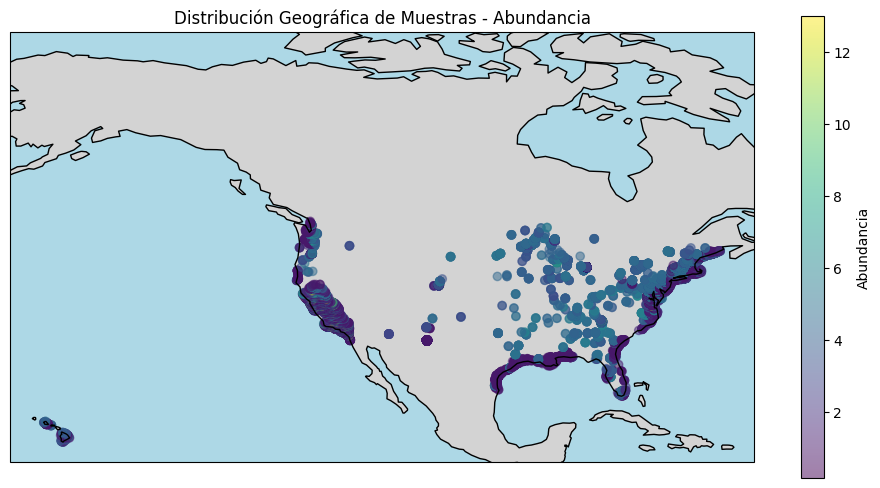

In [27]:
import geopandas as gpd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcolors

# Crear la figura y los ejes con proyección geográfica
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Agregar el mapa base (costas, fronteras, océanos, etc.)
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.COASTLINE, edgecolor='black')

# Graficar los puntos de abundancia
scatter = ax.scatter(
    df_biodiversidad_final2['LONGITUDE'], df_biodiversidad_final2['LATITUDE'], 
    c=df_biodiversidad_final2['sum.allrawdata.ABUNDANCE'], 
    cmap='viridis', alpha=0.5, transform=ccrs.PlateCarree()
)

# Agregar barra de color y etiquetas
plt.colorbar(scatter, label='Abundancia')
ax.set_title("Distribución Geográfica de Muestras - Abundancia")

# Mostrar el gráfico
plt.show()

In [28]:
estadisticas_por_estudio = df_biodiversidad_final2.groupby("STUDY_ID").describe()
print(estadisticas_por_estudio)

           LATITUDE                                                          \
              count       mean           std       min       25%        50%   
STUDY_ID                                                                      
56.000000       4.0  34.200000  0.000000e+00  34.20000  34.20000  34.200000   
57.000000       1.0  43.992800           NaN  43.99280  43.99280  43.992800   
112.000000      2.0  26.495000  2.616295e-01  26.31000  26.40250  26.495000   
120.000000     33.0  20.087518  1.008443e+00  18.92200  19.14320  19.808700   
121.000000      7.0  20.646414  1.047771e+00  19.52630  19.52630  21.486500   
...             ...        ...           ...       ...       ...        ...   
428.086957      1.0  34.350000           NaN  34.35000  34.35000  34.350000   
431.164062      1.0  34.350000           NaN  34.35000  34.35000  34.350000   
435.969371      1.0  34.350000           NaN  34.35000  34.35000  34.350000   
477.000000     11.0  37.222000  7.452235e-15  37.222

In [29]:
estadisticas_por_año = df_biodiversidad_final2.groupby("YEAR").count()
print(estadisticas_por_año)

      LATITUDE  LONGITUDE  sum.allrawdata.ABUNDANCE  STUDY_ID  \
YEAR                                                            
1990       311        311                       311       311   
1991       747        747                       747       747   
1992       747        747                       747       747   
1993       793        793                       793       793   
1994       613        613                       613       613   
1995       750        750                       749       750   
1996       934        934                       933       934   
1997      1380       1380                      1380      1380   
1998      1417       1417                      1417      1417   
1999      1080       1080                      1080      1080   
2000      1679       1679                      1676      1679   
2001      1959       1959                      1958      1959   
2002      1774       1774                      1773      1774   
2003      1833       1833

## Comparar las condiciones de contaminantes entre las ubicaciones con alta y baja abundancia

Dividimos en grupos de alta y baja abundancia, definimos percentiles para separar los datos en alta y baja abundancia:

In [31]:
# Calcular percentiles para definir alta y baja abundancia
q_low = df_biodiversidad_final2['sum.allrawdata.ABUNDANCE'].quantile(0.25)  # 25% más bajo
q_high = df_biodiversidad_final2['sum.allrawdata.ABUNDANCE'].quantile(0.75)  # 25% más alto

# Crear categorías
df_biodiversidad_final2['Abundancia_Grupo'] = np.where(
    df_biodiversidad_final2['sum.allrawdata.ABUNDANCE'] <= q_low, 'Baja Abundancia',
    np.where(df_biodiversidad_final2['sum.allrawdata.ABUNDANCE'] >= q_high, 'Alta Abundancia', 'Media')
)

Esto clasifica las ubicaciones en tres categorías:

Baja Abundancia (25% con menos abundancia).
Media (50% intermedio).
Alta Abundancia (25% con más abundancia).

Ahora, comparamos niveles de contaminantes entre grupos
Ahora podemos visualizar los niveles promedio de contaminantes entre estos grupos:

<Figure size 1200x600 with 0 Axes>

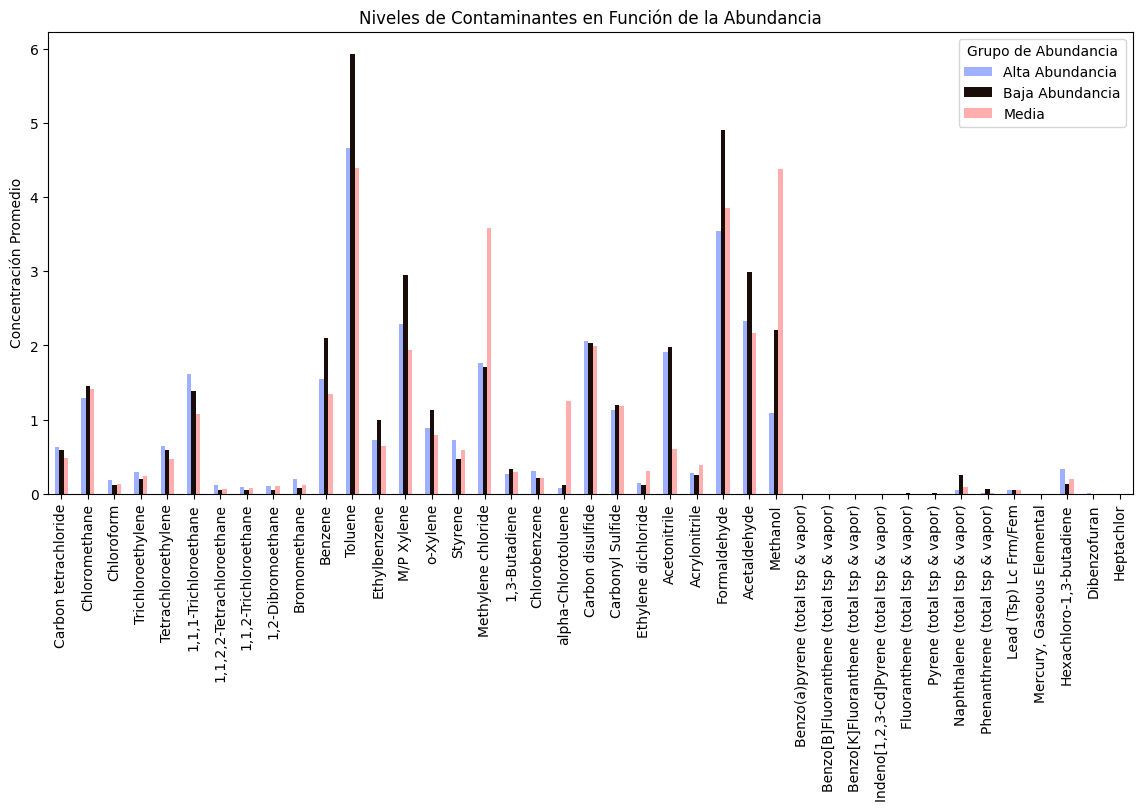

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las columnas de contaminantes
contaminantes = ['Carbon tetrachloride', 'Chloromethane', 'Chloroform', 'Trichloroethylene', 'Tetrachloroethylene', '1,1,1-Trichloroethane', '1,1,2,2-Tetrachloroethane', '1,1,2-Trichloroethane', 
                 '1,2-Dibromoethane', 'Bromomethane', 'Benzene', 'Toluene', 'Ethylbenzene', 'M/P Xylene', 'o-Xylene', 'Styrene', 'Methylene chloride', '1,3-Butadiene', 'Chlorobenzene', 'alpha-Chlorotoluene', 
                 'Carbon disulfide', 'Carbonyl Sulfide', 'Ethylene dichloride', 'Acetonitrile', 'Acrylonitrile', 'Formaldehyde', 'Acetaldehyde', 'Methanol', 'Benzo(a)pyrene (total tsp & vapor)', 
                 'Benzo[B]Fluoranthene (total tsp & vapor)', 'Benzo[K]Fluoranthene (total tsp & vapor)', 'Indeno[1,2,3-Cd]Pyrene (total tsp & vapor)', 'Fluoranthene (total tsp & vapor)', 'Pyrene (total tsp & vapor)', 
                 'Naphthalene (total tsp & vapor)', 'Phenanthrene (total tsp & vapor)', 'Lead (Tsp) Lc Frm/Fem', 'Mercury, Gaseous Elemental', 'Hexachloro-1,3-butadiene', 'Dibenzofuran', 'Heptachlor']

# Calcular medias de contaminantes por grupo de abundancia
df_contaminantes = df_biodiversidad_final2.groupby('Abundancia_Grupo')[contaminantes].mean().T

# Crear gráfico de barras
plt.figure(figsize=(12, 6))
df_contaminantes.plot(kind='bar', figsize=(14, 6), colormap='berlin')
plt.ylabel("Concentración Promedio")
plt.title("Niveles de Contaminantes en Función de la Abundancia")
plt.xticks(rotation=90)
plt.legend(title="Grupo de Abundancia")
plt.show()

Ahora tenemos abundancia promedio por ubicación.

Podemos visualizar con Boxplots

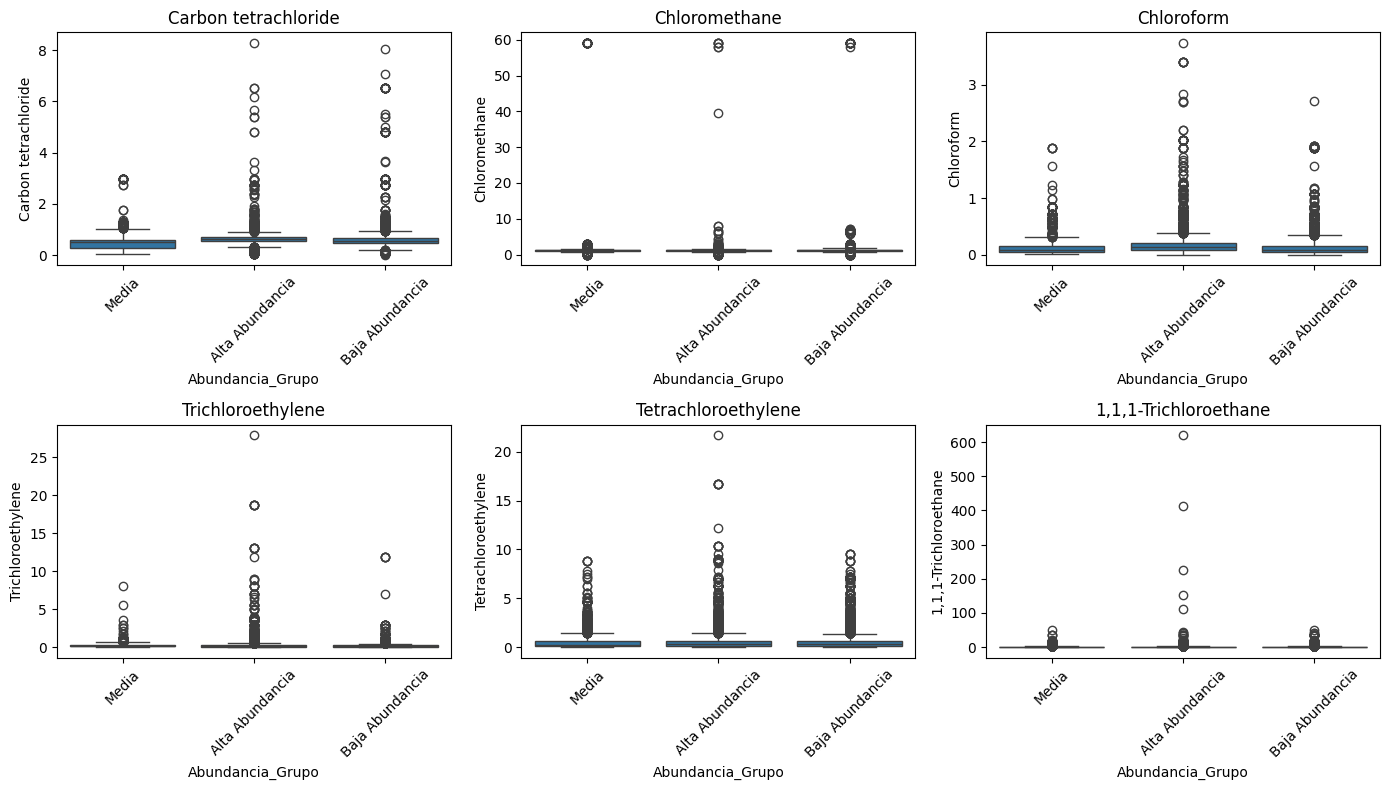

In [33]:
plt.figure(figsize=(14, 8))
for i, cont in enumerate(contaminantes[:6]):  # Tomamos los primeros 6 contaminantes
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=df_biodiversidad_final2, x='Abundancia_Grupo', y=cont)
    plt.title(cont)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [36]:
df_biodiversidad_final2_no_outliers=remove_outliers(df_biodiversidad_final2,contaminantes)

q_low = df_biodiversidad_final2_no_outliers['sum.allrawdata.ABUNDANCE'].quantile(0.50)  # 25% más bajo

df_baja_abundancia = df_biodiversidad_final2_no_outliers[df_biodiversidad_final2_no_outliers['sum.allrawdata.ABUNDANCE'] <= q_low]
df_alta_abundancia = df_biodiversidad_final2_no_outliers[df_biodiversidad_final2_no_outliers['sum.allrawdata.ABUNDANCE'] > q_low]

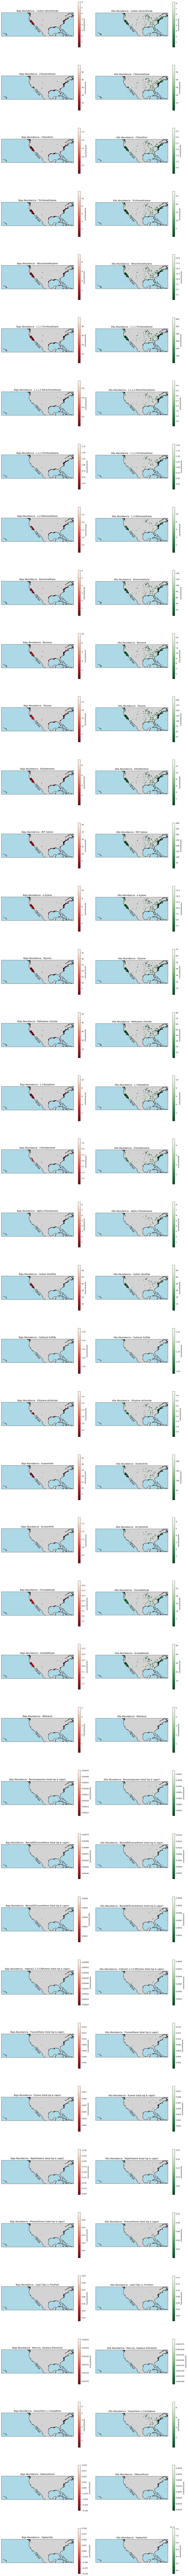

In [37]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Lista de contaminantes a graficar
contaminantes = ['Carbon tetrachloride', 'Chloromethane', 'Chloroform', 'Trichloroethylene', 'Tetrachloroethylene', '1,1,1-Trichloroethane', '1,1,2,2-Tetrachloroethane', '1,1,2-Trichloroethane', 
                 '1,2-Dibromoethane', 'Bromomethane', 'Benzene', 'Toluene', 'Ethylbenzene', 'M/P Xylene', 'o-Xylene', 'Styrene', 'Methylene chloride', '1,3-Butadiene', 'Chlorobenzene', 'alpha-Chlorotoluene', 
                 'Carbon disulfide', 'Carbonyl Sulfide', 'Ethylene dichloride', 'Acetonitrile', 'Acrylonitrile', 'Formaldehyde', 'Acetaldehyde', 'Methanol', 'Benzo(a)pyrene (total tsp & vapor)', 
                 'Benzo[B]Fluoranthene (total tsp & vapor)', 'Benzo[K]Fluoranthene (total tsp & vapor)', 'Indeno[1,2,3-Cd]Pyrene (total tsp & vapor)', 'Fluoranthene (total tsp & vapor)', 'Pyrene (total tsp & vapor)', 
                 'Naphthalene (total tsp & vapor)', 'Phenanthrene (total tsp & vapor)', 'Lead (Tsp) Lc Frm/Fem', 'Mercury, Gaseous Elemental', 'Hexachloro-1,3-butadiene', 'Dibenzofuran', 'Heptachlor']

# Definir las filas y columnas de la figura (una fila por contaminante, 3 columnas por abundancia)
fig, axes = plt.subplots(len(contaminantes), 2, figsize=(15, len(contaminantes) * 5), subplot_kw={'projection': ccrs.PlateCarree()})

# Diccionario con los DataFrames de cada grupo de abundancia
abundancia_dict = {
    'Baja': df_baja_abundancia,
    'Alta': df_alta_abundancia
}

# Iterar sobre los contaminantes y los niveles de abundancia
for i, contaminante in enumerate(contaminantes):
    for j, (nivel, df) in enumerate(abundancia_dict.items()):
        ax = axes[i, j]  # Seleccionamos la subfigura correspondiente

        # Agregar características del mapa
        ax.add_feature(cfeature.LAND, facecolor='lightgray')
        ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
        ax.add_feature(cfeature.COASTLINE, edgecolor='black')

        # Graficar los puntos de abundancia con color según concentración del contaminante
        if nivel=='Baja':
            scatter = ax.scatter(
            df['LONGITUDE'], df['LATITUDE'], 
            c=df[contaminante], cmap='Reds_r', alpha=1,s=1,transform=ccrs.PlateCarree(),
            )
        elif nivel=='Alta':
            scatter = ax.scatter(
                df['LONGITUDE'], df['LATITUDE'], 
                c=df[contaminante], cmap='Greens_r', alpha=1,s=1,transform=ccrs.PlateCarree(),
            )

        # Agregar título y barra de color
        ax.set_title(f"{nivel} Abundancia - {contaminante}")
        cbar = plt.colorbar(scatter, ax=ax, orientation="vertical", shrink=0.6)
        cbar.set_label('Concentración')

# Ajustar el layout para evitar superposiciones
plt.tight_layout()
plt.show()